In [51]:
ls ../data/raw

'README for link + attrs for Aus kaggle dataset.txt'
'SALM Smoothed SA2 Datafiles (ASGS 2016) - March quarter 2022 (1).csv'
 au.csv:Zone.Identifier
 example.json
 example.json.txt
'kaggle data australian cities.csv'
'list of SA2 and their SA3 and state.xlsx'
 weatherAUS.csv


# Import all libraries needed here

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

In [2]:
ls ../data/raw

'README for link + attrs for Aus kaggle dataset.txt'
'SALM Smoothed SA2 Datafiles (ASGS 2016) - March quarter 2022 (1).csv'
 au.csv:Zone.Identifier
 example.json
 example.json.txt
'kaggle data australian cities.csv'
'list of SA2 and their SA3 and state.xlsx'
 weatherAUS.csv


# Read in the weather datasets and the employment dataset

In [831]:
weather_data_raw = pd.read_csv('../data/raw/weatherAUS.csv')
employment_data_raw = pd.read_csv('../data/raw/SALM Smoothed SA2 Datafiles (ASGS 2016) - March quarter 2022 (2).csv')

In [4]:
weather_data_raw.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,3/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,4/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,5/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
weather_data_raw['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

# Read in data to assist in filtering SA2s in Victoria
- for employment data

In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
sa2_and_states = pd.read_excel('../data/raw/list of SA2 and their SA3 and state.xlsx')

In [8]:
sa2_and_states.head()

,SA2_5DIGITCODE_2016,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,GCCSA_CODE_2016,GCCSA_NAME_2016,STATE_CODE_2016,STATE_NAME_2016,AREA_ALBERS_SQKM,Unnamed: 12,Unnamed: 13
0,11007,101021007,Braidwood,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3418.3525,NaN,NaN
1,11008,101021008,Karabar,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,6.9825,NaN,This spreadsheet is downloaded from the ABS We...
2,11009,101021009,Queanbeyan,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,4.7634,NaN,https://www.abs.gov.au/AUSSTATS/abs@.nsf/Detai...
3,11010,101021010,Queanbeyan - East,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,13.0034,NaN,Its name is
4,11011,101021011,Queanbeyan Region,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3054.4099,NaN,Statistical Area Level 2 (SA2) ASGS Edition 20...


# Read in Australian City Data to Filter Out Cities in Victoria
- for the weather dataset

In [127]:
cities_states_lookup = pd.read_csv('../data/raw/kaggle data australian cities.csv')

In [128]:
cities_states_lookup.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714


Obtain ALL cities in VICTORIA

In [591]:
vic_cities = cities_states_lookup[cities_states_lookup['admin_name'] == 'Victoria']

In [592]:
vic_cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
9,Geelong,-38.1500,144.3500,Australia,AU,Victoria,NaN,263280,191440
16,Ballarat,-37.5500,143.8500,Australia,AU,Victoria,NaN,105471,98543
17,Bendigo,-36.7500,144.2667,Australia,AU,Victoria,NaN,99122,95587
27,Shepparton,-36.3833,145.4000,Australia,AU,Victoria,NaN,51631,31197
...,...,...,...,...,...,...,...,...,...
1015,Smythesdale,-37.6500,143.6833,Australia,AU,Victoria,NaN,1032,1032
1019,Coleraine,-37.6000,141.7000,Australia,AU,Victoria,NaN,1029,1029
1025,Wesburn,-37.7670,145.6470,Australia,AU,Victoria,NaN,1019,1019
1027,Lethbridge,-37.9667,144.1330,Australia,AU,Victoria,NaN,1014,1014


# Also, as per the attribute documentation on the weather dataset, the <code>Location</code> column does not specify the "granularity" of the location (e.g. town, city, etc)

But, given that we have <code>cities_states_lookup</code> dataset,
- So a starting point might be to filter out all weather observations that were *not definitely* taken in Victoria
    - That is, if the value in <code>Location</code> is located in any city that does *not* belong in Victoria (we have the dataset <code>cities_states_lookup</code>), then we have high confidence that the weather observation was *not* taken in Victoria.
    - As for the rest of <code>Location</code>, we look whether they exist in <code>vic_cities</code> or not. 
        - If not, then if there's only few such values we can do a quick google search as to whether it is located in Victoria or not. 

# I. Preprocessing the weather dataset

To make the preprocessing steps more compact, versatile, and reversible, 

I will create a dictionary (where its value is also a dictionary) as such: 

- <code> history_weather_preproc = { num_iteration: {'data': pd_data, 'description': what_is_done} } </code>, where: 
    - <code>num_iteration = 0,1,2,...</code> signifying how many times the dataset has been altered for preprocessing
    - <code>history_weather_preproc[num_iteration]['description']</code> is a (preferrably short) description of what has been done to the dataframe, in which the resulting dataframe will be stored in <code>history_weather_preproc[num_iteration]['data']</code>



A caveat of this is that it can be memory intensive but we'll see the consequences later

Initializing the dictionary mentioned above,

In [89]:
history_weather_preproc = {0: {'data': weather_data_raw, 'description':'raw dataset'}}

In [92]:
#In case if I forget what kind of history do I keep track on preprocessing
history_weather_preproc[0].keys()

dict_keys(['data', 'description'])

In [93]:
#Example: accessing the description of what has been done to the data by:
history_weather_preproc[0]['description']

'raw dataset'

In [98]:
#Example: accessing the resulting *preprocessed* dataframe itself:
history_weather_preproc[0]['data'].head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,3/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No


In [97]:
#Finally, to keep track of the preprocessing steps we've done:
history_weather_preproc.keys()

dict_keys([0])

# First thing to do is check whether there's inconsistent formatting for both:

1. <code>Location</code> column in the weather dataset
2. <code>city</code> column in the <code>cities_states_lookup</code> and <code>vic_cities</code>

In [614]:
history_weather_preproc[0]['data']['Location'].sort_values().unique()

array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object)

For the weather dataset, it seems that locations with more than 1 word are *not* separated by whitespace, using camel case instead.

In [613]:
cities_states_lookup['city'][
    cities_states_lookup['city'].str.strip().str.contains(' ')
].sort_values().unique()[0:20]

array(['Agnes Water', 'Airlie Beach', 'Alice River', 'Alice Springs',
       'Alligator Creek', 'Alton Downs', 'Angle Vale', 'Anna Bay',
       'Apollo Bay', 'Bacchus Marsh', 'Badger Creek', 'Bakers Hill',
       'Banora Point', 'Barwon Heads', 'Basin View', 'Batemans Bay',
       'Bay View', 'Beaconsfield Upper', 'Beauty Point', 'Belgrave South'],
      dtype=object)

While the <code>cities_state_lookup</code> dataset has its 2-word city names naturally separated by whitespace.

# <font color='blue'>Pre-processing: To mitigate this, I will appropriately separate 2-word locations in the weather dataset *by whitespace* so that is is consistent with <code>cities_states_lookup</code></font>

A function to separate 2-word locations in the weather dataset, provided that each word always begin with a capital letter. 

In [629]:
#function to separate 2-word locations on weather dataset
import re

def combine_words(match):
    return f'{match.group(1)}{match.group(2)} {match.group(3)}'

def sepr_by_whitespace(location_str):
    #the function combine_words specifies how do we want to alter
    #the input string "location_str"
    return re.sub(r'([A-Z])([a-z]+)([A-Z])',combine_words,location_str)

#as an example, 
print(sepr_by_whitespace('GoldCoast'))
print(sepr_by_whitespace('PearceRAAF'))

#make sure that one-word locations are still retained as is 
print(sepr_by_whitespace('Sydney'))


Gold Coast
Pearce RAAF
Sydney


In [635]:
history_weather_preproc[0]['data']['Location'].map(lambda location: sepr_by_whitespace(location)).unique()[0:10]

array(['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
       'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond'],
      dtype=object)

This counts as the next step of our preprocessing.

In [633]:
history_weather_preproc[1]['data'] = history_weather_preproc[0]['data'].copy()

In [636]:
history_weather_preproc[1]['data']['Location'] = history_weather_preproc[1]['data']['Location'].map(lambda location: sepr_by_whitespace(location))

Take a look at the transformed <code>Location</code> values, make sure that there's nothing clunky going on.

In [639]:
history_weather_preproc[1]['data']['Location'].unique()

array(['Albury', 'Badgerys Creek', 'Cobar', 'Coffs Harbour', 'Moree',
       'Newcastle', 'Norah Head', 'Norfolk Island', 'Penrith', 'Richmond',
       'Sydney', 'Sydney Airport', 'Wagga Wagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'Mount Ginini',
       'Ballarat', 'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne',
       'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane',
       'Cairns', 'Gold Coast', 'Townsville', 'Adelaide', 'Mount Gambier',
       'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'Pearce RAAF',
       'Perth Airport', 'Perth', 'Salmon Gums', 'Walpole', 'Hobart',
       'Launceston', 'Alice Springs', 'Darwin', 'Katherine', 'Uluru'],
      dtype=object)

Document this preprocessing step.

In [640]:
history_weather_preproc[1]['description'] = 'Separated locations in weather dataset by whitespace, instead of camel case'

# Filter out <code>Location</code>s that are cities that are not definitely in Victoria.

Obtain cities that are not in Victoria.

In [647]:
#filter all cities outside Victoria
cities_not_in_vic = cities_states_lookup[
    cities_states_lookup['admin_name'] != 'Victoria'
    ]['city']

In [656]:
cities_not_in_vic.unique()[0:10]

array(['Sydney', 'Brisbane', 'Perth', 'Adelaide', 'Gold Coast',
       'Canberra', 'Newcastle', 'Wollongong', 'Hobart', 'Townsville'],
      dtype=object)

In [649]:
#obtain all weather observations outside Victoria
weather_obs_not_in_vic = history_weather_preproc[1]['data'][
    history_weather_preproc[1]['data']['Location'].isin(cities_not_in_vic)
]

In [657]:
#obtain all indexes of the weather observations that are not in Victoria
weather_obs_not_in_vic_idx = weather_obs_not_in_vic.index

In [658]:
weather_obs_not_in_vic_idx

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            213970, 213971, 213972, 213973, 213974, 213975, 213976, 213977,
            213978, 213979],
           dtype='int64', length=111826)

Now, the rest of the observations *should be* in Victoria..

In [670]:
history_weather_preproc[1]['data'][
    ~history_weather_preproc[1]['data'].index.\
        isin(weather_obs_not_in_vic_idx)
]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
4531,1/01/2009,Badgerys Creek,13.3,34.2,0.0,NaN,NaN,W,61.0,NNE,...,NaN,1005.6,NaN,NaN,NaN,21.0,NaN,No,0.0,No
4532,2/01/2009,Badgerys Creek,14.7,26.1,0.0,NaN,NaN,SE,46.0,SE,...,54.0,1012.9,1013.5,NaN,NaN,20.7,22.2,No,0.0,No
4533,3/01/2009,Badgerys Creek,13.6,22.3,0.0,NaN,NaN,NNE,30.0,ESE,...,51.0,1021.9,1019.2,NaN,NaN,17.9,21.7,No,0.0,No
4534,4/01/2009,Badgerys Creek,17.7,31.2,0.0,NaN,NaN,NE,39.0,NNE,...,43.0,1018.7,1013.6,NaN,NaN,22.0,30.6,No,0.0,No
4535,5/01/2009,Badgerys Creek,15.5,38.8,0.0,NaN,NaN,SW,50.0,NNE,...,19.0,1013.2,1007.6,NaN,NaN,22.7,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217044,24/08/2022,Uluru,3.9,19.4,0.0,NaN,NaN,ESE,46.0,ESE,...,21.0,1030.9,1026.5,NaN,NaN,10.2,18.2,No,0.0,No
217045,25/08/2022,Uluru,3.6,20.0,0.0,NaN,NaN,E,44.0,E,...,17.0,1028.0,1023.6,NaN,NaN,10.4,19.8,No,0.0,No
217046,26/08/2022,Uluru,3.8,21.2,0.0,NaN,NaN,E,35.0,E,...,16.0,1024.2,1019.4,5.0,NaN,11.2,20.1,No,0.0,No
217047,27/08/2022,Uluru,3.2,24.6,0.0,NaN,NaN,ENE,28.0,ESE,...,10.0,1019.9,1014.3,NaN,NaN,12.2,23.4,No,0.0,No


In [671]:
history_weather_preproc[1]['data'][
    ~history_weather_preproc[1]['data'].index.\
        isin(weather_obs_not_in_vic_idx)
]['Location'].unique()

array(['Badgerys Creek', 'Norah Head', 'Norfolk Island', 'Sydney Airport',
       'Williamtown', 'Tuggeranong', 'Mount Ginini', 'Ballarat',
       'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Woomera',
       'Witchcliffe', 'Pearce RAAF', 'Perth Airport', 'Salmon Gums',
       'Walpole', 'Uluru'], dtype=object)

It seems like there are some <code>Locations</code> which are still located outside Australia (e.g. Sydney Airport, Perth Airport, etc), meaning that they are not cities per se.

# <font color='blue'>Preprocessing: However, we can still filter the weather dataset such that the locations are the ones listed above</font>

This counts as the next step of our preprocessing.

In [666]:
history_weather_preproc[2]= {'data':None, 'description':None}

In [672]:
history_weather_preproc[2]['data'] = history_weather_preproc[1]['data'][
    ~history_weather_preproc[1]['data'].index.\
        isin(weather_obs_not_in_vic_idx)
].copy()

In [674]:
history_weather_preproc[2]['data'].head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
4531,1/01/2009,Badgerys Creek,13.3,34.2,0.0,NaN,NaN,W,61.0,NNE,...,NaN,1005.6,NaN,NaN,NaN,21.0,NaN,No,0.0,No
4532,2/01/2009,Badgerys Creek,14.7,26.1,0.0,NaN,NaN,SE,46.0,SE,...,54.0,1012.9,1013.5,NaN,NaN,20.7,22.2,No,0.0,No
4533,3/01/2009,Badgerys Creek,13.6,22.3,0.0,NaN,NaN,NNE,30.0,ESE,...,51.0,1021.9,1019.2,NaN,NaN,17.9,21.7,No,0.0,No
4534,4/01/2009,Badgerys Creek,17.7,31.2,0.0,NaN,NaN,NE,39.0,NNE,...,43.0,1018.7,1013.6,NaN,NaN,22.0,30.6,No,0.0,No
4535,5/01/2009,Badgerys Creek,15.5,38.8,0.0,NaN,NaN,SW,50.0,NNE,...,19.0,1013.2,1007.6,NaN,NaN,22.7,37.6,No,0.0,No


Document this preprocessing step.

In [676]:
history_weather_preproc[2]['description'] = 'Filter out cities that are definitely not in Victoria'

# As for the rest of the <code>Location</code>s in the weather dataset, I proceed to: 
- obtain the shapefile for Victoria (the boundaries, coordinate-wise)
- latitude and longitude for each weather observation in whereever the observation was taken

Since the granularity of the rest of <code>Location</code> is unknown, a better method is to determine whether each of the location of the weather observation falls in the boundary of Victoria or not.

Import the datasets containing the geographic location of each weather observation.

In [683]:
location_weather = pd.read_csv('../data/raw/locationsAUS.csv')
location_weather.head()

,stnID,name,stnNum,latitude,longitude
0,2002,Albury,72160,-36.0690,146.9509
1,2005,BadgerysCreek,67108,-33.8969,150.7281
2,2029,Cobar,48027,-31.4840,145.8294
3,2030,CoffsHarbour,59040,-30.3107,153.1187
4,2084,Moree,53115,-29.4914,149.8458


Make sure that the locations in the weather dataset and the ones above are consistent.

In [686]:
set(location_weather['name']) - set(history_weather_preproc[0]['data']['Location']) ==\
     set(location_weather['name']) - set(history_weather_preproc[0]['data']['Location']) ==\
        set()

True

# <font color='blue'>Pre-processing: Match each <code>Location</code> in the (partially preprocesssed) weather dataset with its corresponding geographic coordinate </font>

Since the locations in <code>location_weather</code> are still not properly formatted (2-word locations are not separated by whitespace) we can format this real quick

In [689]:
location_weather['name'] = location_weather['name'].map(lambda location: sepr_by_whitespace(location))

In [693]:
#obtain each weather observation's latitude and longitude, temporarily store in in a variable before officially documenting
#this as another preprocessing step
weather_with_lat_and_lng = history_weather_preproc[2]['data'].merge(location_weather[['name','latitude','longitude']],
                                    left_on = 'Location',
                                    right_on = 'name',
                                    how = 'inner').\
                                    drop(columns='name').\
                                    copy()

In [731]:
#
weather_with_lat_and_lng.shape[0] == history_weather_preproc[2]['data'].shape[0]

True

Document this as another preprocessing step.

In [736]:
history_weather_preproc[3] = {'data':None, 'description':None}
history_weather_preproc[3]['data'] = weather_with_lat_and_lng
history_weather_preproc[3]['description'] = 'added geographic location for the location of each weather observation'

# Import the shapefile for each state in Australia

In [ ]:
states_shpfiles = gpd.read_file('../data/raw/STE_2021_AUST_GDA2020.shp')

In [ ]:
states_shpfiles

,STE_CODE21,STE_NAME21,CHG_FLAG21,CHG_LBL21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,1,New South Wales,0,No change,AUS,Australia,8.007977e+05,http://linked.data.gov.au/dataset/asgsed3/STE/1,"MULTIPOLYGON (((159.06230 -31.50886, 159.06218..."
1,2,Victoria,0,No change,AUS,Australia,2.274962e+05,http://linked.data.gov.au/dataset/asgsed3/STE/2,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
2,3,Queensland,0,No change,AUS,Australia,1.730171e+06,http://linked.data.gov.au/dataset/asgsed3/STE/3,"MULTIPOLYGON (((142.53140 -10.68301, 142.53072..."
3,4,South Australia,0,No change,AUS,Australia,9.842314e+05,http://linked.data.gov.au/dataset/asgsed3/STE/4,"MULTIPOLYGON (((140.66025 -38.06256, 140.66006..."
4,5,Western Australia,0,No change,AUS,Australia,2.526632e+06,http://linked.data.gov.au/dataset/asgsed3/STE/5,"MULTIPOLYGON (((117.86953 -35.19108, 117.86961..."
5,6,Tasmania,0,No change,AUS,Australia,6.801754e+04,http://linked.data.gov.au/dataset/asgsed3/STE/6,"MULTIPOLYGON (((144.60439 -41.01001, 144.60443..."
6,7,Northern Territory,0,No change,AUS,Australia,1.348134e+06,http://linked.data.gov.au/dataset/asgsed3/STE/7,"MULTIPOLYGON (((133.02818 -10.90839, 133.02982..."
7,8,Australian Capital Territory,0,No change,AUS,Australia,2.358133e+03,http://linked.data.gov.au/dataset/asgsed3/STE/8,"POLYGON ((149.06239 -35.15910, 149.09134 -35.1..."
8,9,Other Territories,0,No change,AUS,Australia,2.557420e+02,http://linked.data.gov.au/dataset/asgsed3/STE/9,"MULTIPOLYGON (((167.94747 -29.12757, 167.94748..."
9,Z,Outside Australia,1,New,ZZZ,Outside Australia,NaN,http://linked.data.gov.au/dataset/asgsed3/STE/Z,None


# Specifically, obtain the state shapefile in Victoria. 

In [733]:
vic_shp_geometry = states_shpfiles.loc[states_shpfiles['STE_NAME21'] == 'Victoria', 'geometry'].values[0]

# For each remaining weather observations, determine whether its location is located in Victoria or not.

In [760]:
weather_data_3rd_iter = history_weather_preproc[3]['data'].copy()
weather_data_3rd_iter['coord_point_object'] = weather_data_3rd_iter.apply(lambda row: Point(row['longitude'], row['latitude']),axis=1)

In [762]:
location_and_its_coord = weather_data_3rd_iter[['Location','coord_point_object']].set_index('Location')

In [763]:
is_weather_locs_in_vic = {}
for loc_weather in weather_data_3rd_iter['Location'].unique():

    coord_in_loc = location_and_its_coord.loc[loc_weather,:].iloc[0,:].values[0]

    is_weather_locs_in_vic[loc_weather] = coord_in_loc.within(vic_shp_geometry)


/home/keithzyyy/.local/lib/python3.8/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(


# Indicator variable: is a location of a weather observation located in Victoria?

In [768]:
weather_data_3rd_iter['is_in_vic'] = weather_data_3rd_iter['Location'].map(lambda location: is_weather_locs_in_vic[location])

In [771]:
weather_data_3rd_iter[weather_data_3rd_iter['is_in_vic'] == True]['Location'].unique()

array(['Ballarat', 'Bendigo', 'Sale', 'Melbourne Airport', 'Melbourne',
       'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor'],
      dtype=object)

# <font color='blue'>Preprocessing: only keep weather observations  which were taken in Victoria with the aid of shapefile in Victoria </font>

In [775]:
history_weather_preproc[4] = {'data':None,'description':None}
history_weather_preproc[4]['data'] = weather_data_3rd_iter[weather_data_3rd_iter['is_in_vic'] == True].drop(columns='is_in_vic')
history_weather_preproc[4]['description'] = 'only retaining weather observations which were recorded in Victoria'

In [776]:
history_weather_preproc[4]['data']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude,coord_point_object
31527,1/12/2008,Ballarat,5.8,17.6,3.2,NaN,NaN,W,52.0,W,...,6.0,NaN,10.4,15.7,Yes,0.4,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31528,2/12/2008,Ballarat,4.3,19.5,0.4,NaN,NaN,WNW,44.0,WNW,...,6.0,8.0,12.5,17.6,No,0.6,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31529,3/12/2008,Ballarat,9.5,18.8,0.6,NaN,NaN,W,43.0,WSW,...,4.0,8.0,11.2,16.5,No,0.2,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31530,4/12/2008,Ballarat,6.7,21.8,0.2,NaN,NaN,NNE,39.0,ENE,...,4.0,NaN,14.4,20.6,No,1.2,Yes,-37.5127,143.7911,POINT (143.7911 -37.5127)
31531,5/12/2008,Ballarat,13.3,25.6,1.2,NaN,NaN,NW,61.0,NNW,...,6.0,1.0,18.3,24.3,Yes,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75328,24/08/2022,Dartmoor,6.0,12.1,2.8,NaN,NaN,WSW,39.0,WNW,...,NaN,NaN,9.5,10.7,Yes,4.6,Yes,-37.9222,141.2614,POINT (141.2614 -37.9222)
75329,25/08/2022,Dartmoor,8.9,13.5,4.6,NaN,NaN,SSW,17.0,SSW,...,NaN,NaN,10.7,13.2,Yes,0.4,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75330,26/08/2022,Dartmoor,5.9,12.7,0.4,NaN,NaN,NW,11.0,ENE,...,NaN,NaN,7.8,12.3,No,0.2,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75331,27/08/2022,Dartmoor,4.6,17.5,0.2,NaN,NaN,N,35.0,NNE,...,NaN,NaN,9.4,16.0,No,0.0,No,-37.9222,141.2614,POINT (141.2614 -37.9222)


In [777]:
weather_data_vic = history_weather_preproc[4]['data']

In [791]:
weather_data_vic

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude,coord_point_object
31527,1/12/2008,Ballarat,5.8,17.6,3.2,NaN,NaN,W,52.0,W,...,6.0,NaN,10.4,15.7,Yes,0.4,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31528,2/12/2008,Ballarat,4.3,19.5,0.4,NaN,NaN,WNW,44.0,WNW,...,6.0,8.0,12.5,17.6,No,0.6,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31529,3/12/2008,Ballarat,9.5,18.8,0.6,NaN,NaN,W,43.0,WSW,...,4.0,8.0,11.2,16.5,No,0.2,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31530,4/12/2008,Ballarat,6.7,21.8,0.2,NaN,NaN,NNE,39.0,ENE,...,4.0,NaN,14.4,20.6,No,1.2,Yes,-37.5127,143.7911,POINT (143.7911 -37.5127)
31531,5/12/2008,Ballarat,13.3,25.6,1.2,NaN,NaN,NW,61.0,NNW,...,6.0,1.0,18.3,24.3,Yes,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75328,24/08/2022,Dartmoor,6.0,12.1,2.8,NaN,NaN,WSW,39.0,WNW,...,NaN,NaN,9.5,10.7,Yes,4.6,Yes,-37.9222,141.2614,POINT (141.2614 -37.9222)
75329,25/08/2022,Dartmoor,8.9,13.5,4.6,NaN,NaN,SSW,17.0,SSW,...,NaN,NaN,10.7,13.2,Yes,0.4,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75330,26/08/2022,Dartmoor,5.9,12.7,0.4,NaN,NaN,NW,11.0,ENE,...,NaN,NaN,7.8,12.3,No,0.2,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75331,27/08/2022,Dartmoor,4.6,17.5,0.2,NaN,NaN,N,35.0,NNE,...,NaN,NaN,9.4,16.0,No,0.0,No,-37.9222,141.2614,POINT (141.2614 -37.9222)


# Next, we can parse the dates and separate them into <code>day, month, year</code>

Since all the dates are roughly formatted as <code>DD/MM/YYYY</code> we can split them by '/'

In [792]:
split_dates = weather_data_vic['Date'].str.split('/', expand=True).rename(columns={0:'Day',1:'Month',2:'Year'})

Check the unique values of each day, month, and year

In [794]:
split_dates['Day'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [795]:
split_dates['Month'].unique()

array(['12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11'], dtype=object)

In [796]:
split_dates['Year'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

Probably can parse each of them as integers (not necessarily numerical)

In [799]:
split_dates['Day'] = split_dates['Day'].astype('int')
split_dates['Month'] = split_dates['Month'].astype('int')
split_dates['Year'] = split_dates['Year'].astype('int')

In [804]:
split_dates

,Day,Month,Year
31527,1,12,2008
31528,2,12,2008
31529,3,12,2008
31530,4,12,2008
31531,5,12,2008
...,...,...,...
75328,24,8,2022
75329,25,8,2022
75330,26,8,2022
75331,27,8,2022


# Since the order of the data for <code>split_dates</code> and <code>weather_data_vic</code> is preserved, I proceed to concatenate the former into the latter.

In [808]:
pd.concat([split_dates, weather_data_vic],axis=1).drop(columns='Date')

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude,coord_point_object
31527,1,12,2008,Ballarat,5.8,17.6,3.2,NaN,NaN,W,...,6.0,NaN,10.4,15.7,Yes,0.4,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31528,2,12,2008,Ballarat,4.3,19.5,0.4,NaN,NaN,WNW,...,6.0,8.0,12.5,17.6,No,0.6,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31529,3,12,2008,Ballarat,9.5,18.8,0.6,NaN,NaN,W,...,4.0,8.0,11.2,16.5,No,0.2,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
31530,4,12,2008,Ballarat,6.7,21.8,0.2,NaN,NaN,NNE,...,4.0,NaN,14.4,20.6,No,1.2,Yes,-37.5127,143.7911,POINT (143.7911 -37.5127)
31531,5,12,2008,Ballarat,13.3,25.6,1.2,NaN,NaN,NW,...,6.0,1.0,18.3,24.3,Yes,0.0,No,-37.5127,143.7911,POINT (143.7911 -37.5127)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75328,24,8,2022,Dartmoor,6.0,12.1,2.8,NaN,NaN,WSW,...,NaN,NaN,9.5,10.7,Yes,4.6,Yes,-37.9222,141.2614,POINT (141.2614 -37.9222)
75329,25,8,2022,Dartmoor,8.9,13.5,4.6,NaN,NaN,SSW,...,NaN,NaN,10.7,13.2,Yes,0.4,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75330,26,8,2022,Dartmoor,5.9,12.7,0.4,NaN,NaN,NW,...,NaN,NaN,7.8,12.3,No,0.2,No,-37.9222,141.2614,POINT (141.2614 -37.9222)
75331,27,8,2022,Dartmoor,4.6,17.5,0.2,NaN,NaN,N,...,NaN,NaN,9.4,16.0,No,0.0,No,-37.9222,141.2614,POINT (141.2614 -37.9222)


# <font color='blue'>Preprocessing: parsing the dates into each of <code>Day, Month, Year</code></font>

This is counted as an official preprocessing step.

In [810]:
#how many iterations are we in right now
history_weather_preproc.keys()

dict_keys([0, 1, 2, 3, 4])

In [812]:
history_weather_preproc[5] = {'data':None, 'description':None}
history_weather_preproc[5]['data'] = pd.concat([split_dates, weather_data_vic],axis=1).drop(columns='Date').copy()
history_weather_preproc[5]['description'] = 'parsed the dates into each of day, month, and year'

In [815]:
weather_data_vic = history_weather_preproc[5]['data']

In [829]:
weather_data_vic.dtypes[weather_data_vic.dtypes == 'object']

Location              object
WindGustDir           object
WindDir9am            object
WindDir3pm            object
RainToday             object
RainTomorrow          object
coord_point_object    object
dtype: object

# For each column in the weather dataset, calculate the % of missing columns

In [817]:
nrows_weather = weather_data_vic.shape[0]

#to display the missing values, it would be helpful to show the proportion (0-1) missing
#and the actual number of instances missing. 
weather_missing_vals_per_col = pd.DataFrame(pd.concat(
    [round( 100*(weather_data_vic.isna().sum() / nrows_weather),2 ).sort_values(),
    weather_data_vic.isna().sum().sort_values()
    ], 
    axis=1), 
)
weather_missing_vals_per_col.columns = ['Proportion_missing', 'Num_missing'] 

In [818]:
weather_missing_vals_per_col

,Proportion_missing,Num_missing
Day,0.00,0
latitude,0.00,0
longitude,0.00,0
coord_point_object,0.00,0
Month,0.00,0
Location,0.00,0
Year,0.00,0
Temp3pm,1.21,532
MaxTemp,1.29,564
MinTemp,1.35,590


Although the column with the lowest missing values only contain 1.55% of missing values, the number of instances itself is quite a lot (in this case, 500 ish)

I will investigate the top 4 columns containing the largest proportion of missing values.
- 

# <font color='red'>Important note</font>: it turns out that <code>Cloud9am</code> and <code>Cloud3pm</code> are NOT numerical variables. They are ordinal. 
From the documentation, 
- <code>Cloud9am</code>: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records **how many eigths of the sky are obscured by cloud**. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

- <code>Cloud3pm</code>: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

In [1185]:
weather_data_vic[['Cloud9am', 'Cloud3pm']] = weather_data_vic[['Cloud9am', 'Cloud3pm']].astype('Int64')

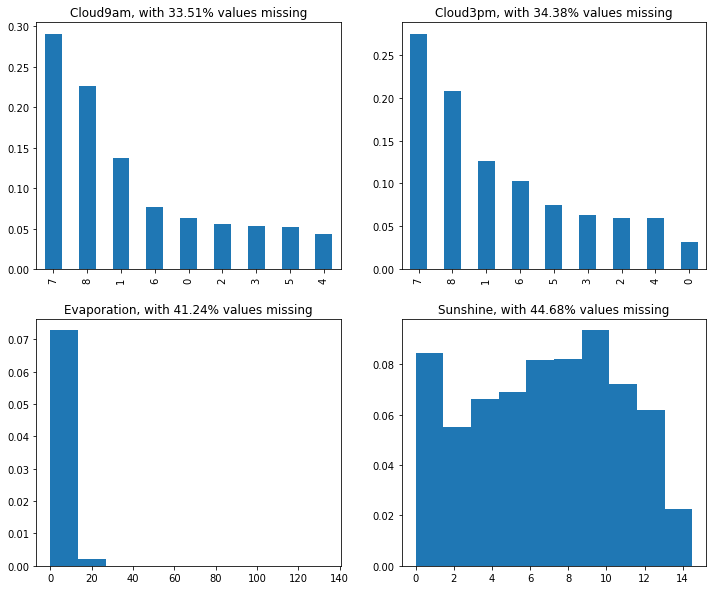

In [1186]:
#number of columns with top 4 most missing values
cols_with_most_missing = ['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine']

NUM_COLS_MOST_MISSING_VALS = len(cols_with_most_missing)

plt.figure(figsize=(12,10))
for i in range(1, NUM_COLS_MOST_MISSING_VALS + 1):

    plt.subplot(2,2,i)

    col = cols_with_most_missing[i-1]

    #to access value in a 1x1 dataframe, use df.values[0] 
    #which returns an array. So need to access it again 
    proportion_missing_col = weather_missing_vals_per_col.loc[
                [col],['Proportion_missing']
                ].\
                values[0]\
                [0]

    plt.title(f'{col}, with {round(proportion_missing_col,2)}% values missing')

    #plot the distribution of 'col', but only from the  
    #data without any missing values

    if weather_data_vic.dtypes[col] == 'float64':
        plt.hist(
            weather_data_vic[col][~weather_data_vic[col].isna()],
            density=True
        )
    else:
        weather_data_vic[col].value_counts(normalize=True).plot.bar()

    

Just realized that plotting distributions of these columns probably wouldn't make sense because the instances *may* not be independent due to the nature of the data collection (i.e. data is a time series)


Except for <code>evaporation</code>, the distributions are somewhat bimodal, which makes it harder to decide the imputation.

- However, a naive approach could be constructed such that for each column <code>col</code> in <code>Cloud9am, Cloud3pm, Sunshine</code>, we can choose a clustering method to assign each data point to one of 2 clusters. (May be somewhat of a "supervised imputation technique"?)

    - Then, for a cluster, say, <code>k</code>, we would be likely to expect some kind of pattern exhibited by at least 1 of the other attributes (aside from these 4). 
    - If an instance with its value in <code>col</code> missing exhibit such pattern then we impute with either the mean or median of cluster <code>k</code>. 

A problem for this is that since the total instances is over ~40k and that 40-50% (which is the range of missing values from the top 4 columns above) yields around ~10k we'd expect a large variability among the instances, especially that these data is collected based on time



 

# In order to continue the analysis, it would make sense to sort the weather observations chronologically. 

In [1034]:
weather_data_vic_chronological = weather_data_vic.sort_values(['Year', 'Month', 'Day'])
weather_data_vic_chronological.head()

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude,coord_point_object
49580,1,7,2008,Melbourne,9.5,15.4,2.0,2.8,7.0,W,...,1.0,7.0,11.0,14.6,Yes,0.6,No,-37.8075,144.97,POINT (144.97 -37.8075)
49581,2,7,2008,Melbourne,11.0,14.5,0.6,5.2,4.0,W,...,7.0,4.0,11.8,13.7,No,1.4,Yes,-37.8075,144.97,POINT (144.97 -37.8075)
49582,3,7,2008,Melbourne,8.4,14.1,1.4,2.0,0.8,W,...,7.0,7.0,10.6,13.9,Yes,0.6,No,-37.8075,144.97,POINT (144.97 -37.8075)
49583,4,7,2008,Melbourne,9.1,14.5,0.6,1.8,4.2,E,...,7.0,6.0,10.2,13.1,No,0.0,No,-37.8075,144.97,POINT (144.97 -37.8075)
49584,5,7,2008,Melbourne,4.3,15.5,0.0,0.8,8.4,N,...,2.0,5.0,5.5,14.6,No,0.0,No,-37.8075,144.97,POINT (144.97 -37.8075)


# As mentioned before, <font color='red'>Important note</font>: it turns out that <code>Cloud9am</code> and <code>Cloud3pm</code> are NOT numerical variables. They are ordinal. 
From the documentation, 
- <code>Cloud9am</code>: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records **how many eigths of the sky are obscured by cloud**. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

- <code>Cloud3pm</code>: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

In [1093]:
#Note: Int64 allows nullable integers while int doesn't.
weather_data_vic_chronological[['Cloud9am','Cloud3pm']] = weather_data_vic_chronological[['Cloud9am','Cloud3pm']].astype('Int64')

# Now, Imputating columns that have quite a lot of missing values (esp the top 4 columns above) can be quite tricky here
Since the data collected depends on time (i.e. data is a time series),
- The weather condition of a given day is likely to <font color='red'>*not*</font> be independent of the day before. 
- In fact, our data here is a *collection* of time series, group based on the location (e.g. in Melbourne, Ballarat, etc)


A common imputation technique is LOCF/Last Observation Carried Forward
- Basically a given NaN value will be imputed from the previous non-NaN value. 


So I will impute the missing values for the top columns above *category-wise* based on <code>Location</code>, with assumptions that:
- the proportion of missing values of each column (in the top 4 columns above) for each category of <code>Location</code> is not as much as the original (~45%) 
- the trend of 2 consecutive days having the same value of a column (e.g. Evaporation for 2 consecutive days is the same) is quite common, but *not too common* in the sense
that the column is basically not informative (e.g. the values of <code>Evaporation</code> is just, say, [6,6,6,....,6]) at all (albeit the LOCF method working really well here)

In [1351]:
def check_assumption_for_LOCF_based_on_another_col(weather_data_vic_chronological, col_group = 'Location', 
                                col_most_missing = 'Cloud9am'):
    
    '''Since data is basically a time series, a common imputation method for 
    missing values in time series is Last Observation Carried Forward/LOCF. 

    How it works: 
    For each NaN value, it will be imputed by the value from the previous observation, 
    ASSUMING THAT the trend of having the same value for 2 consecutive days is 
    "common enough", but not "too common" (extreme case the data will just be comprised
    of only one value) such that the column is bascially garbage. 

    
    Intuitively, for the non-NaN instances, if this behavior of LOCF is common then 
    a LOCF imputation should make sense'''

    for loc in weather_data_vic_chronological[col_group].unique():

        data = list(weather_data_vic_chronological[weather_data_vic_chronological[col_group] == loc][col_most_missing])
        num_nonmissing_same_adj_vals = 0
        total_nonmissing_adj_vals = 0
        data_same_adj_vals = []


        #out of all consecutive pairs that are non-NaNs, count the ones that are adjacent to each other. 

        for i in range(1, len(data)):

            if not(pd.Series(data[i]).isna()[0]) and not(pd.Series(data[i-1]).isna()[0]):
                if data[i] - data[i-1] == 0:
                    data_same_adj_vals.append(data[i])
                    num_nonmissing_same_adj_vals += 1
                total_nonmissing_adj_vals += 1
        

        #how many missing values of col_most_missing in the location loc?
        missing_vals_for_col_in_loc = pd.Series(data).isna().sum()
        prop_missing = round(100 * missing_vals_for_col_in_loc/len(data),2)

        #It might be the case that the column for data[col_most_missing] on loc (a particular value of col_group)
        #has all values missing. In this case total_nonmissing_adj_vals = 0.
        
        try:
            prop_adj = round( 100 * num_nonmissing_same_adj_vals / total_nonmissing_adj_vals, 2)

        except ZeroDivisionError:
            print(f"for column {col_most_missing} in {col_group}{loc}, all values are missing")
            print(f"   Also, for column {col_most_missing} in {col_group}{loc}, have {missing_vals_for_col_in_loc} values missing ({prop_missing}%)")
            continue
            
        print(f"For column {col_most_missing} in {col_group}{loc}, have {num_nonmissing_same_adj_vals} similar (non-NaN) adj values out of all (non-NaN) {total_nonmissing_adj_vals} values ({prop_adj}%)")
        print(f"   Also, for column {col_most_missing} in {col_group}{loc}, have {missing_vals_for_col_in_loc} values missing ({prop_missing}%)")  



In [1352]:
check_assumption_for_LOCF_based_on_another_col(weather_data_vic_chronological, col_group = 'Location', 
                                col_most_missing = 'Cloud9am')

For column Cloud9am in LocationMelbourne, have 929 similar (non-NaN) adj values out of all (non-NaN) 3484 values (26.66%)
   Also, for column Cloud9am in LocationMelbourne, have 944 values missing (20.15%)
For column Cloud9am in LocationBallarat, have 990 similar (non-NaN) adj values out of all (non-NaN) 2953 values (33.53%)
   Also, for column Cloud9am in LocationBallarat, have 1013 values missing (22.36%)
For column Cloud9am in LocationBendigo, have 679 similar (non-NaN) adj values out of all (non-NaN) 2141 values (31.71%)
   Also, for column Cloud9am in LocationBendigo, have 1766 values missing (39.05%)
For column Cloud9am in LocationSale, have 543 similar (non-NaN) adj values out of all (non-NaN) 2275 values (23.87%)
   Also, for column Cloud9am in LocationSale, have 2093 values missing (46.51%)
For column Cloud9am in LocationMelbourne Airport, have 1241 similar (non-NaN) adj values out of all (non-NaN) 4490 values (27.64%)
   Also, for column Cloud9am in LocationMelbourne Airport,

Originally, the <code>Cloud9am</code> column has over 33% of missing values within the entire dataset. 
- Grouping the dataset based on <code>Location</code>, the proportions are somewhat less than that (aside from <code>Location = Sale</code>, for which <code>Cloud9am</code> column has 46.5% missing values, but I'll probably tolerate it since there's only one such column)

In [1353]:
check_assumption_for_LOCF_based_on_another_col(weather_data_vic_chronological, col_group = 'Location', 
                                col_most_missing = 'Cloud3pm')

For column Cloud3pm in LocationMelbourne, have 950 similar (non-NaN) adj values out of all (non-NaN) 3428 values (27.71%)
   Also, for column Cloud3pm in LocationMelbourne, have 1017 values missing (21.71%)
For column Cloud3pm in LocationBallarat, have 966 similar (non-NaN) adj values out of all (non-NaN) 2372 values (40.73%)
   Also, for column Cloud3pm in LocationBallarat, have 1463 values missing (32.29%)
For column Cloud3pm in LocationBendigo, have 680 similar (non-NaN) adj values out of all (non-NaN) 2667 values (25.5%)
   Also, for column Cloud3pm in LocationBendigo, have 1325 values missing (29.3%)
For column Cloud3pm in LocationSale, have 470 similar (non-NaN) adj values out of all (non-NaN) 2245 values (20.94%)
   Also, for column Cloud3pm in LocationSale, have 2110 values missing (46.89%)
For column Cloud3pm in LocationMelbourne Airport, have 1273 similar (non-NaN) adj values out of all (non-NaN) 4484 values (28.39%)
   Also, for column Cloud3pm in LocationMelbourne Airport, 

In [1356]:
check_assumption_for_LOCF_based_on_another_col(weather_data_vic_chronological, col_group = 'Location', 
                                col_most_missing = 'Evaporation')

For column Evaporation in LocationMelbourne, have 225 similar (non-NaN) adj values out of all (non-NaN) 4667 values (4.82%)
   Also, for column Evaporation in LocationMelbourne, have 11 values missing (0.23%)
for column Evaporation in LocationBallarat, all values are missing
   Also, for column Evaporation in LocationBallarat, have 4531 values missing (100.0%)
For column Evaporation in LocationBendigo, have 74 similar (non-NaN) adj values out of all (non-NaN) 1177 values (6.29%)
   Also, for column Evaporation in LocationBendigo, have 3337 values missing (73.79%)
For column Evaporation in LocationSale, have 114 similar (non-NaN) adj values out of all (non-NaN) 1821 values (6.26%)
   Also, for column Evaporation in LocationSale, have 2666 values missing (59.24%)
For column Evaporation in LocationMelbourne Airport, have 216 similar (non-NaN) adj values out of all (non-NaN) 4483 values (4.82%)
   Also, for column Evaporation in LocationMelbourne Airport, have 11 values missing (0.24%)
For

In [1357]:
check_assumption_for_LOCF_based_on_another_col(weather_data_vic_chronological, col_group = 'Location', 
                                col_most_missing = 'Sunshine')

For column Sunshine in LocationMelbourne, have 99 similar (non-NaN) adj values out of all (non-NaN) 4677 values (2.12%)
   Also, for column Sunshine in LocationMelbourne, have 3 values missing (0.06%)
for column Sunshine in LocationBallarat, all values are missing
   Also, for column Sunshine in LocationBallarat, have 4531 values missing (100.0%)
for column Sunshine in LocationBendigo, all values are missing
   Also, for column Sunshine in LocationBendigo, have 4522 values missing (100.0%)
For column Sunshine in LocationSale, have 37 similar (non-NaN) adj values out of all (non-NaN) 1804 values (2.05%)
   Also, for column Sunshine in LocationSale, have 2682 values missing (59.6%)
For column Sunshine in LocationMelbourne Airport, have 98 similar (non-NaN) adj values out of all (non-NaN) 4493 values (2.18%)
   Also, for column Sunshine in LocationMelbourne Airport, have 3 values missing (0.07%)
For column Sunshine in LocationMildura, have 190 similar (non-NaN) adj values out of all (non-

Problems, which lead to me deleting of all the top 4 columns: 
1. in each of the top 4 columns, there's at least 1 value of <code>Location</code> in which the values of that column are all comprised of <code>NaN</code>s, which is problematic because we said that we want to impute *category-wise*.
    - And also if we impute that means that, with, say, the mode of the column for the <code>NaN</code>s in that value of <code>Location</code>, we're going to propagate errors towards thousands of instances (3000-4000), which we don't want.

2. There's also at least 1 value of <code>Location</code> for which the missing values from one of the top 4 columns is more than 50%. 

3. With LOCF imputation, I am not sure how much of the exact same adjacent values should we see in order to regard the LOCF imputation as a valid imputation.
- Visualisation is not possible because for each <code>Location</code> (there are 10 of them) the weather observations were recorded *daily* from 2008 to 2022 and the plot will probably not fit in the screen



# <font color='blue'>Preprocessing: Drop the columns <code>Cloud9am, Cloud3pm, Sunshine, Evaporation</code> from weather dataset</font>

In [1359]:
#how many preprocessing steps have we done?
history_weather_preproc.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [1362]:
history_weather_preproc[6] = {'data':None, 'description':None}
history_weather_preproc[6]['data'] = weather_data_vic_chronological.drop(columns=['Cloud9am', 'Cloud3pm', 'Sunshine', 'Evaporation']).copy()
history_weather_preproc[6]['description'] = 'Dropping the top 4 columns that have the most missing values from the entire dataset'

In [1364]:
weather_data_vic_chronological = history_weather_preproc[6]['data']

In [1365]:
weather_data_vic_chronological

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude,coord_point_object
49580,1,7,2008,Melbourne,9.5,15.4,2.0,W,63.0,W,...,1006.8,1010.3,11.0,14.6,Yes,0.6,No,-37.8075,144.9700,POINT (144.97 -37.8075)
49581,2,7,2008,Melbourne,11.0,14.5,0.6,W,63.0,W,...,1013.4,1016.2,11.8,13.7,No,1.4,Yes,-37.8075,144.9700,POINT (144.97 -37.8075)
49582,3,7,2008,Melbourne,8.4,14.1,1.4,W,39.0,W,...,1024.8,1024.3,10.6,13.9,Yes,0.6,No,-37.8075,144.9700,POINT (144.97 -37.8075)
49583,4,7,2008,Melbourne,9.1,14.5,0.6,E,19.0,NNW,...,1030.2,1029.0,10.2,13.1,No,0.0,No,-37.8075,144.9700,POINT (144.97 -37.8075)
49584,5,7,2008,Melbourne,4.3,15.5,0.0,N,52.0,N,...,1028.9,1024.9,5.5,14.6,No,0.0,No,-37.8075,144.9700,POINT (144.97 -37.8075)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58763,28,8,2022,Mildura,5.1,24.0,0.0,N,50.0,NNE,...,1022.6,1017.2,13.6,23.0,No,0.0,No,-34.2358,142.0867,POINT (142.0867 -34.2358)
61832,28,8,2022,Nhil,7.2,20.3,0.0,NNE,30.0,NE,...,1022.1,1017.6,11.4,19.9,No,0.0,No,-36.3092,141.6486,POINT (141.6486 -36.3092)
66332,28,8,2022,Portland,8.0,19.7,0.0,NNE,35.0,N,...,1020.7,1016.9,12.4,19.2,No,0.2,No,-38.3148,141.4705,POINT (141.4705 -38.3148)
70832,28,8,2022,Watsonia,5.7,20.0,0.0,N,31.0,ENE,...,1024.6,1020.9,13.1,19.6,No,0.0,No,-37.7408,145.0972,POINT (145.0972 -37.7408)


In [1368]:
def quantify_missing_values(weather_data_vic):
    nrows_weather = weather_data_vic.shape[0]

    #to display the missing values, it would be helpful to show the proportion (0-1) missing
    #and the actual number of instances missing. 
    weather_missing_vals_per_col = pd.DataFrame(pd.concat(
        [round( 100*(weather_data_vic.isna().sum() / nrows_weather),2 ).sort_values(),
        weather_data_vic.isna().sum().sort_values()
        ], 
        axis=1), 
    )
    weather_missing_vals_per_col.columns = ['Proportion_missing', 'Num_missing'] 

    return weather_missing_vals_per_col

In [1369]:
quantify_missing_values(weather_data_vic_chronological)

,Proportion_missing,Num_missing
Day,0.00,0
latitude,0.00,0
longitude,0.00,0
coord_point_object,0.00,0
Month,0.00,0
Location,0.00,0
Year,0.00,0
Temp3pm,1.21,532
MaxTemp,1.29,564
MinTemp,1.35,590


# <font color='blue'> Preprocessing: the column <code>WindDir9am</code> is not in the documentation of the weather dataset, so can drop it </font> 

In [1371]:
history_weather_preproc.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [1372]:
history_weather_preproc[7] = {'data':None, 'description':None}
history_weather_preproc[7]['data'] = history_weather_preproc[6]['data'].drop(columns=['WindDir9am']).copy()
history_weather_preproc[7]['description'] = 'Dropping WindDir9am, not in documentation'

In [1373]:
weather_data_vic_chronological = history_weather_preproc[7]['data']

In [1375]:
quantify_missing_values(weather_data_vic_chronological)

,Proportion_missing,Num_missing
Day,0.00,0
latitude,0.00,0
longitude,0.00,0
coord_point_object,0.00,0
Month,0.00,0
Location,0.00,0
Year,0.00,0
Temp3pm,1.21,532
MaxTemp,1.29,564
MinTemp,1.35,590


# Since the missing values are all below 10%, for numerical columns, can do simple mean/median imputation (albeit violating the nature of the data collection in time series)

In [1405]:
weather_data_vic_chronological.dtypes[weather_data_vic_chronological.dtypes == 'float64']

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RISK_MM          float64
latitude         float64
longitude        float64
dtype: object

Impute every column except for latitude and longitude (they dont have any missing values to begin with).

Distribution of <Code>MaxTemp</code> by Location

Text(0.5, 1.0, 'Distribution of MaxTemp by Location')

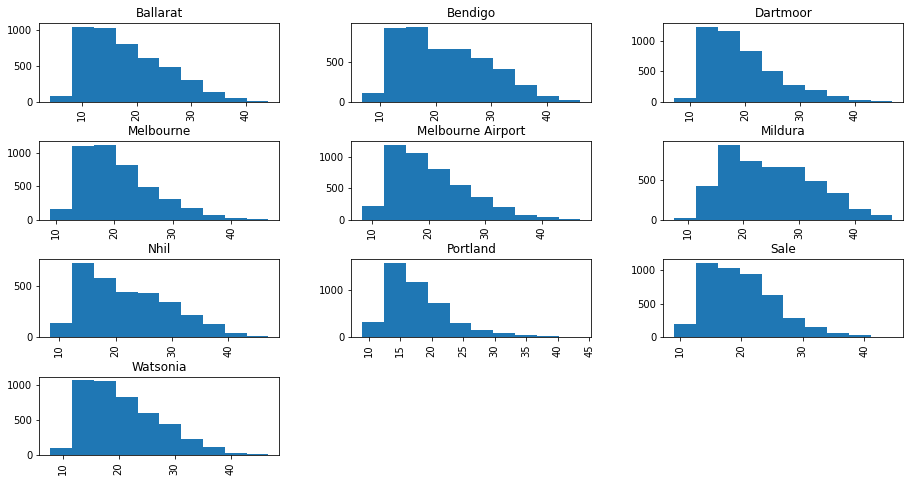

In [1383]:
numerical_col = 'MaxTemp'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )

It seems median imputation per location can be plausible. Confirm this by checking the skewness by each location:

In [1388]:
weather_data_vic_chronological.groupby('Location')['MaxTemp'].skew().sort_values()

Location
Mildura              0.427071
Bendigo              0.527008
Nhil                 0.576663
Ballarat             0.698938
Watsonia             0.782730
Melbourne Airport    0.862163
Sale                 0.868521
Melbourne            0.936175
Dartmoor             1.098861
Portland             1.400947
Name: MaxTemp, dtype: float64

Distribution of <code>MinTemp</code> by Location

array([[<AxesSubplot:title={'center':'Ballarat'}>,
        <AxesSubplot:title={'center':'Bendigo'}>,
        <AxesSubplot:title={'center':'Dartmoor'}>],
       [<AxesSubplot:title={'center':'Melbourne'}>,
        <AxesSubplot:title={'center':'Melbourne Airport'}>,
        <AxesSubplot:title={'center':'Mildura'}>],
       [<AxesSubplot:title={'center':'Nhil'}>,
        <AxesSubplot:title={'center':'Portland'}>,
        <AxesSubplot:title={'center':'Sale'}>],
       [<AxesSubplot:title={'center':'Watsonia'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

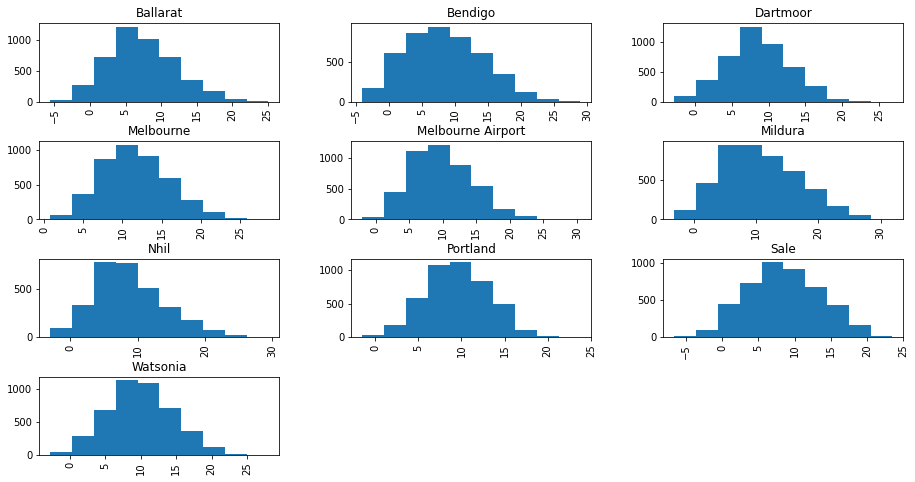

In [1384]:
numerical_col = 'MinTemp'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )

It seems mean imputation per location can be plausible. Confirm this by checking the skewness by each location:

In [1389]:
weather_data_vic_chronological.groupby('Location')['MinTemp'].skew().sort_values()

Location
Portland             0.027304
Sale                 0.080886
Dartmoor             0.154633
Watsonia             0.175487
Bendigo              0.309812
Melbourne            0.320451
Mildura              0.369514
Ballarat             0.411315
Melbourne Airport    0.444487
Nhil                 0.586398
Name: MinTemp, dtype: float64

In [ ]:
weather_data_vic_chronological

Distribution of <Code>Temp3pm</code> by Location

Location
Mildura              0.485805
Bendigo              0.541965
Nhil                 0.606053
Ballarat             0.702994
Watsonia             0.776574
Sale                 0.844162
Melbourne Airport    0.845827
Melbourne            0.937203
Dartmoor             1.084712
Portland             1.313529
Name: Temp3pm, dtype: float64

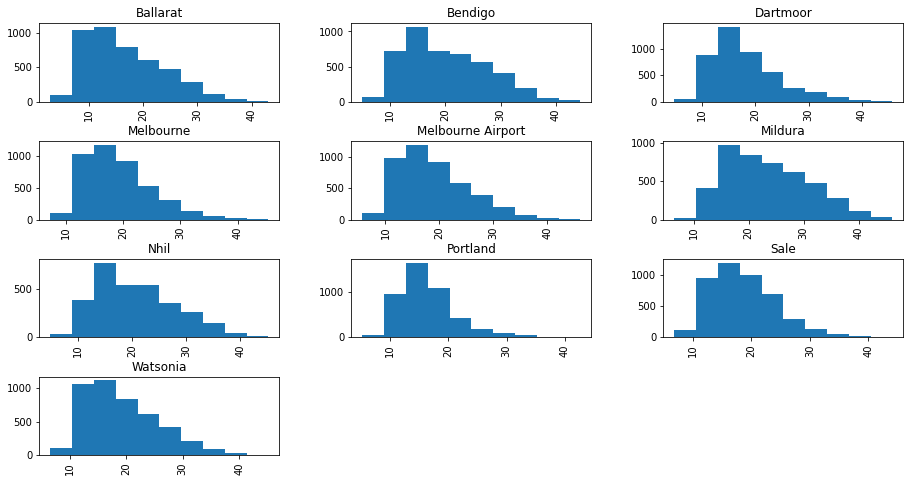

In [1392]:
numerical_col = 'Temp3pm'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
weather_data_vic_chronological.groupby('Location')['Temp3pm'].skew().sort_values()

Median imputation is recommended, smallest value of skewness is already 0.5 and highest exceeds 1.

Location
Sale                 0.081219
Mildura              0.484010
Bendigo              0.501895
Dartmoor             0.519186
Watsonia             0.529946
Melbourne            0.615475
Portland             0.622519
Nhil                 0.646793
Ballarat             0.847887
Melbourne Airport    0.863066
Name: Temp9am, dtype: float64

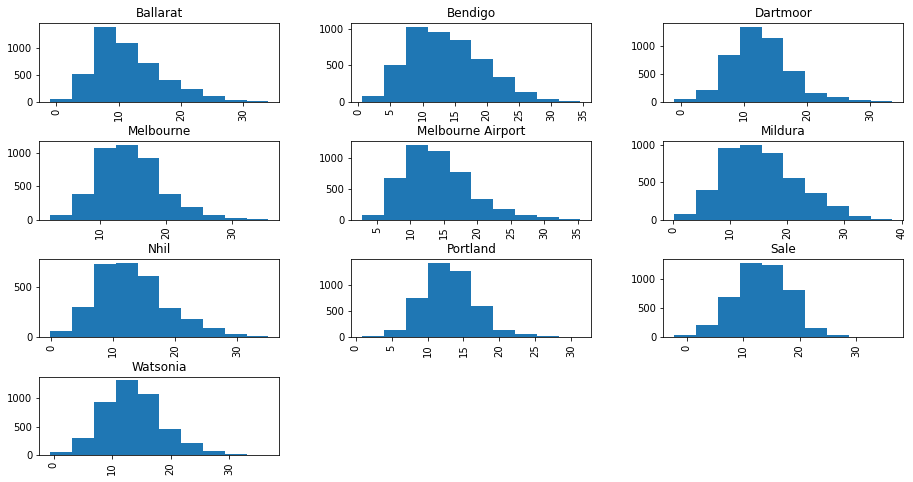

In [1394]:
numerical_col = 'Temp9am'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
#check skewness
weather_data_vic_chronological.groupby('Location')[numerical_col].skew().sort_values()

Mean imputation is recommended, most of the skewness values still lie close to 0

Location
Portland            -0.384322
Dartmoor            -0.246515
Ballarat            -0.017570
Melbourne            0.120145
Melbourne Airport    0.126720
Sale                 0.194011
Nhil                 0.338654
Bendigo              0.342891
Watsonia             0.364253
Mildura              0.862875
Name: Humidity3pm, dtype: float64

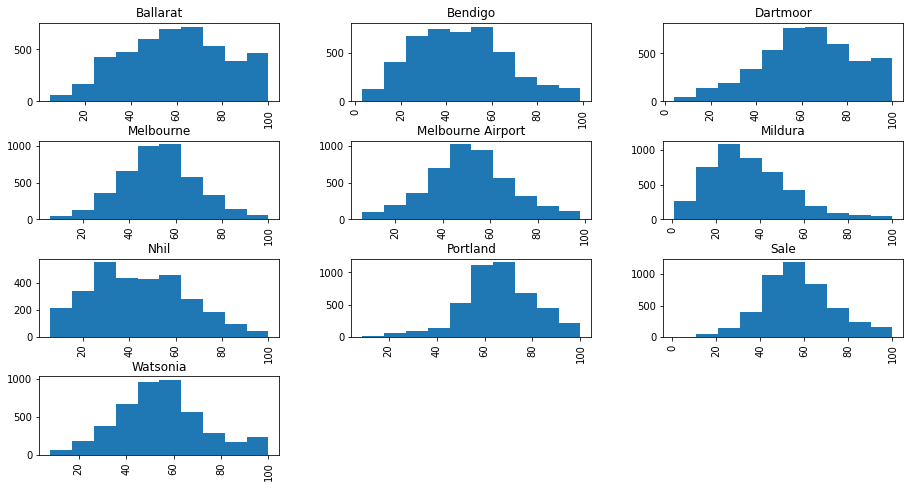

In [1395]:
numerical_col = 'Humidity3pm'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
#check skewness
weather_data_vic_chronological.groupby('Location')[numerical_col].skew().sort_values()

Mean imputation is recommended, most of the skewness values still lie close to 0

Location
Dartmoor            -1.311881
Ballarat            -1.101110
Melbourne Airport   -0.685360
Nhil                -0.679749
Portland            -0.668741
Sale                -0.595799
Watsonia            -0.584391
Melbourne           -0.327078
Bendigo             -0.235908
Mildura             -0.217809
Name: Humidity9am, dtype: float64

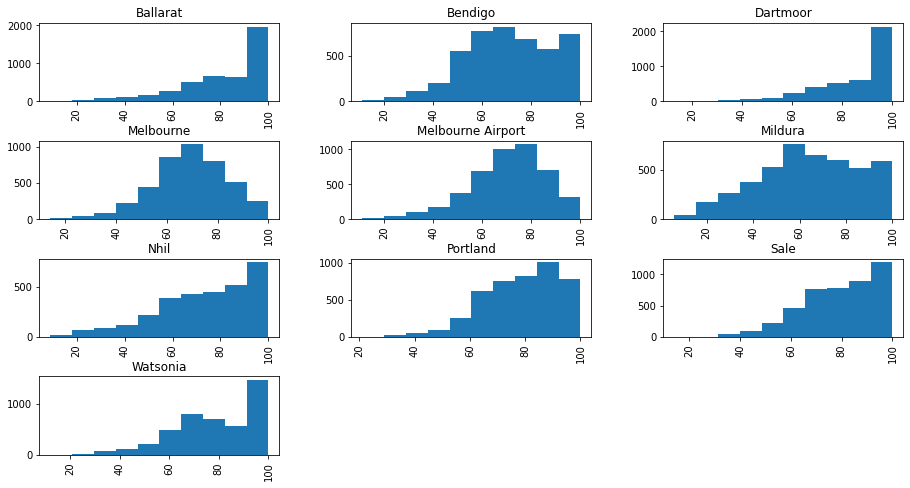

In [1396]:
numerical_col = 'Humidity9am'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
#check skewness
weather_data_vic_chronological.groupby('Location')[numerical_col].skew().sort_values()

Median imputation is recommended, most of the skewness values lie quite far from 0 (albeit negative skew)

Location
Dartmoor              4.697660
Portland              4.723622
Melbourne             5.780948
Bendigo               5.829447
Watsonia              6.157617
Sale                  6.207400
Melbourne Airport     6.455851
Ballarat              6.649614
Nhil                  8.141084
Mildura              15.529216
Name: RISK_MM, dtype: float64

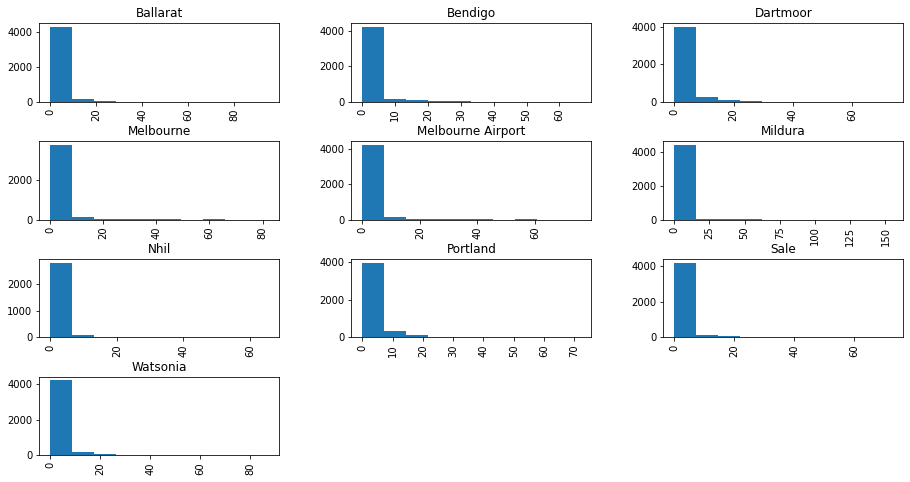

In [1397]:
numerical_col = 'RISK_MM'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
#check skewness
weather_data_vic_chronological.groupby('Location')[numerical_col].skew().sort_values()

Median imputation is recommended here, data is positively skewed

Location
Dartmoor              4.697157
Portland              4.723588
Melbourne             5.780921
Bendigo               5.829407
Watsonia              6.157617
Sale                  6.207400
Melbourne Airport     6.455851
Ballarat              6.649160
Nhil                  8.141159
Mildura              15.529216
Name: Rainfall, dtype: float64

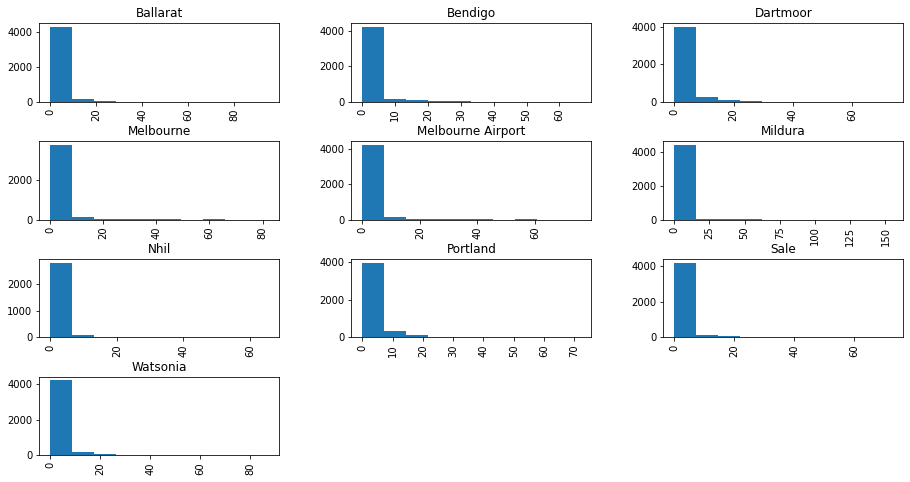

In [1398]:
numerical_col = 'Rainfall'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
#check skewness
weather_data_vic_chronological.groupby('Location')[numerical_col].skew().sort_values()

Median imputation is recommended here, data is positively skewed

Location
Dartmoor             0.362511
Bendigo              0.372340
Watsonia             0.395748
Melbourne Airport    0.457392
Sale                 0.478942
Ballarat             0.531575
Mildura              0.587355
Nhil                 0.667022
Portland             0.813121
Melbourne            0.841655
Name: WindSpeed3pm, dtype: float64

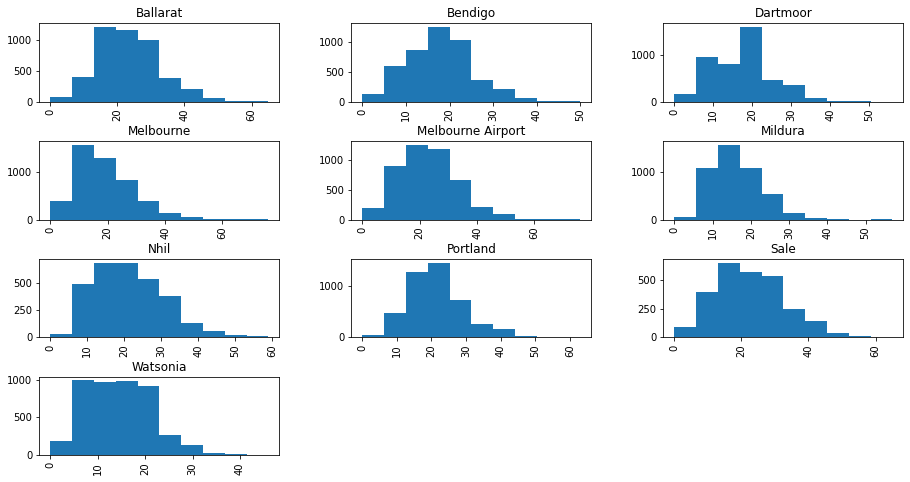

In [1399]:
numerical_col = 'WindSpeed3pm'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
#check skewness
weather_data_vic_chronological.groupby('Location')[numerical_col].skew().sort_values()

Mean imputation is recommended here, most of skewness lie close to 0

Location
Ballarat             0.073589
Mildura              0.240445
Bendigo              0.278388
Nhil                 0.381593
Dartmoor             0.543936
Portland             0.697320
Watsonia             0.823966
Melbourne Airport    0.866147
Sale                 1.160078
Melbourne            1.258989
Name: WindSpeed9am, dtype: float64

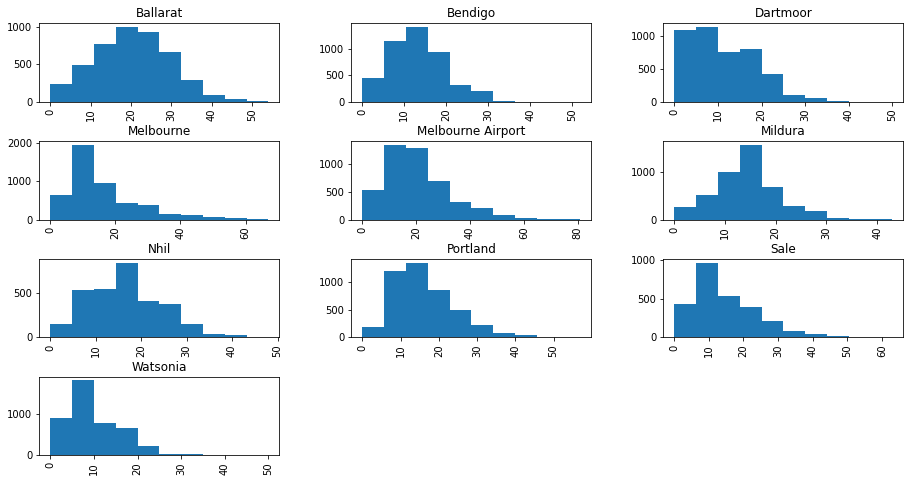

In [1400]:
numerical_col = 'WindSpeed9am'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
#check skewness
weather_data_vic_chronological.groupby('Location')[numerical_col].skew().sort_values()

Mean imputation might be a choice although some values of the skewness exceed 1, but they're still close to 1

Location
Portland            -0.306815
Dartmoor            -0.248810
Melbourne           -0.224043
Sale                -0.210678
Melbourne Airport   -0.193810
Watsonia            -0.188650
Ballarat            -0.155988
Bendigo             -0.065481
Nhil                -0.041273
Mildura              0.013539
Name: Pressure3pm, dtype: float64

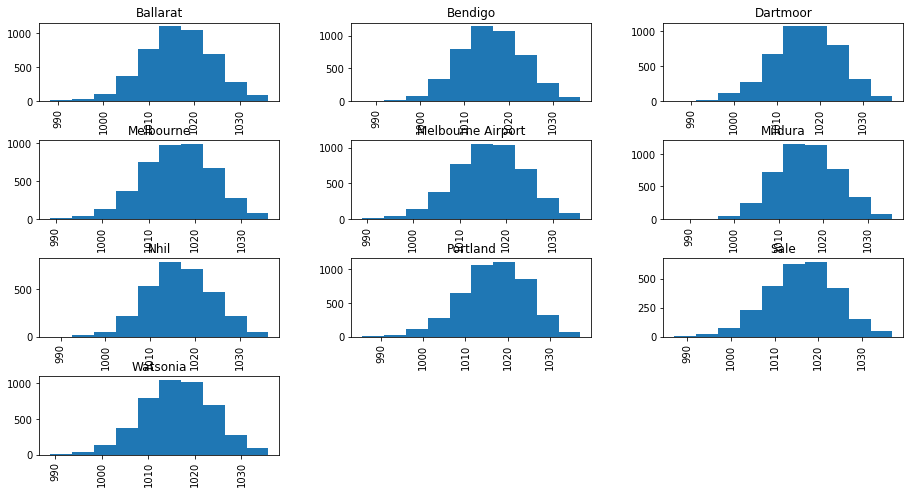

In [1401]:
numerical_col = 'Pressure3pm'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
#check skewness
weather_data_vic_chronological.groupby('Location')[numerical_col].skew().sort_values()

Mean imputation is recommended, skewnesses close to 0

Location
Portland            -0.260316
Melbourne           -0.228461
Dartmoor            -0.224430
Sale                -0.198110
Melbourne Airport   -0.192304
Watsonia            -0.191995
Ballarat            -0.153250
Bendigo             -0.099226
Nhil                -0.088355
Mildura             -0.014839
Name: Pressure9am, dtype: float64

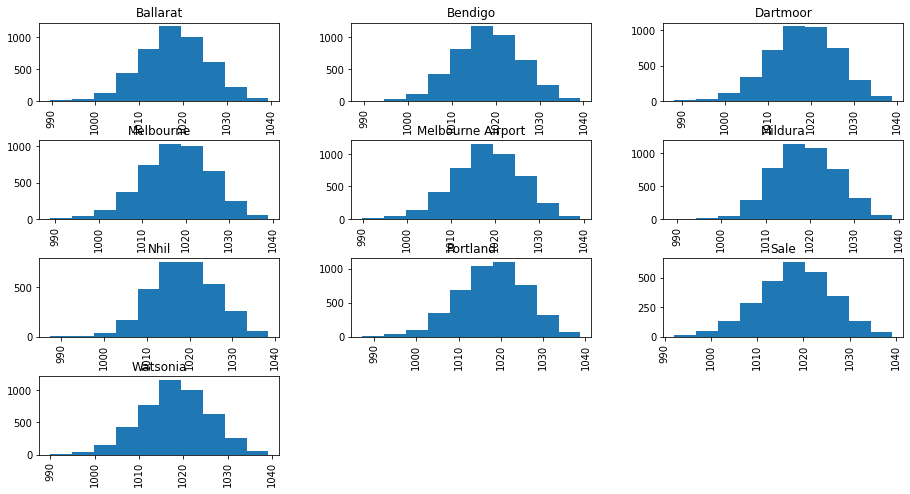

In [1402]:
numerical_col = 'Pressure9am'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
#check skewness
weather_data_vic_chronological.groupby('Location')[numerical_col].skew().sort_values()

Mean imputation is recommended, skewnesses close to 0

Location
Ballarat             0.613155
Watsonia             0.654980
Bendigo              0.675840
Melbourne Airport    0.694676
Dartmoor             0.721763
Nhil                 0.749797
Mildura              0.780113
Portland             0.811642
Melbourne            0.829223
Sale                 0.837681
Name: WindGustSpeed, dtype: float64

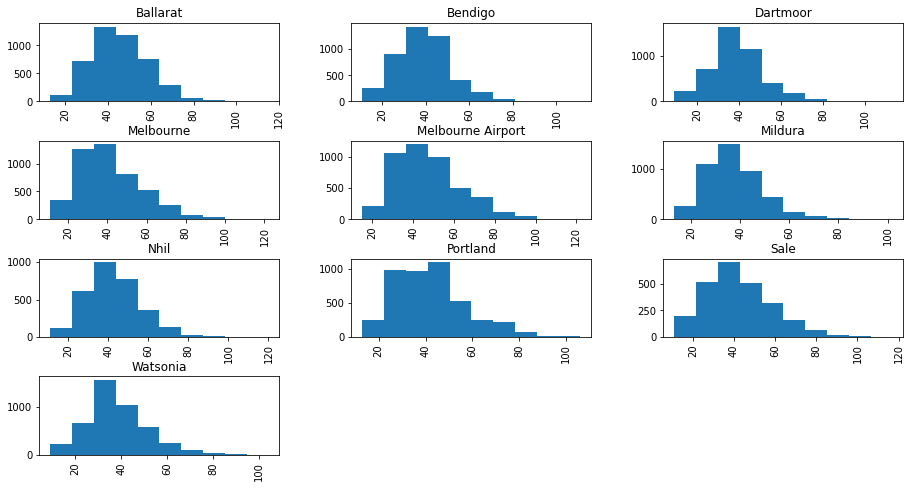

In [1403]:
numerical_col = 'WindGustSpeed'
weather_data_vic_chronological.hist(column=numerical_col, 
                                by='Location', 
                                figsize=(15,8),
                                )
#check skewness
weather_data_vic_chronological.groupby('Location')[numerical_col].skew().sort_values()

Median imputation recommended, smallest value of skewness already 0.6 ish

# Imputing numerical columns in weather dataset

In [1406]:
cols_requiring_mean_imputation = ['MinTemp', 'Temp9am', 'Humidity3pm', 'WindSpeed3pm', 'WindSpeed9am', 'Pressure3pm', 'Pressure9am', 'WindGustSpeed']
cols_requiring_median_imputation = ['Temp3pm', 'MaxTemp', 'Humidity9am', 'RISK_MM', 'Rainfall']

In [1410]:
#mean imputation
weather_data_vic_chronological[cols_requiring_mean_imputation] = weather_data_vic_chronological[cols_requiring_mean_imputation].fillna(
                                weather_data_vic_chronological.\
                                    groupby('Location')\
                                    [cols_requiring_mean_imputation].\
                                    transform('mean')
)

/home/keithzyyy/.local/lib/python3.8/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(


In [1412]:
#median imputation
weather_data_vic_chronological[cols_requiring_median_imputation] = weather_data_vic_chronological[cols_requiring_median_imputation].fillna(
                                weather_data_vic_chronological.\
                                    groupby('Location')\
                                    [cols_requiring_median_imputation].\
                                    transform('mean')
)

/home/keithzyyy/.local/lib/python3.8/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(


# <font color='blue'>Preprocessing weather dataset: imputing numerical columns</font>

In [1413]:
history_weather_preproc.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [1414]:
history_weather_preproc[7] = {'data':None, 'description':None}
history_weather_preproc[7]['data'] = weather_data_vic_chronological.copy()
history_weather_preproc[7]['description'] = 'Imputing numerical columns with either mean/median imputation'

In [1415]:
weather_data_vic_chronological = history_weather_preproc[7]['data']

# Impute the rest of the (categorical) columns

In [1416]:
quantify_missing_values(weather_data_vic_chronological)

,Proportion_missing,Num_missing
Day,0.00,0
latitude,0.00,0
RISK_MM,0.00,0
Temp3pm,0.00,0
Temp9am,0.00,0
Pressure3pm,0.00,0
Pressure9am,0.00,0
Humidity3pm,0.00,0
Humidity9am,0.00,0
longitude,0.00,0


# <font color='blue'>Preprocessing: <code>WindDir3pm</code> is not in the dataset documention, so can delete it</font>

In [1431]:
history_weather_preproc[8] = {'data':None, 'description':None}
history_weather_preproc[8]['data'] = history_weather_preproc[7]['data'].drop(columns='WindDir3pm').copy()
history_weather_preproc[8]['description'] = 'Dropping WindDir3pm, lack of information in documentation'

In [1432]:
weather_data_vic_chronological = history_weather_preproc[8]['data']

In [1433]:
quantify_missing_values(weather_data_vic_chronological)

,Proportion_missing,Num_missing
Day,0.00,0
latitude,0.00,0
RISK_MM,0.00,0
Temp3pm,0.00,0
Temp9am,0.00,0
Pressure3pm,0.00,0
Pressure9am,0.00,0
Humidity3pm,0.00,0
longitude,0.00,0
WindSpeed3pm,0.00,0


# Imputing Missing Values in Categorical Columns

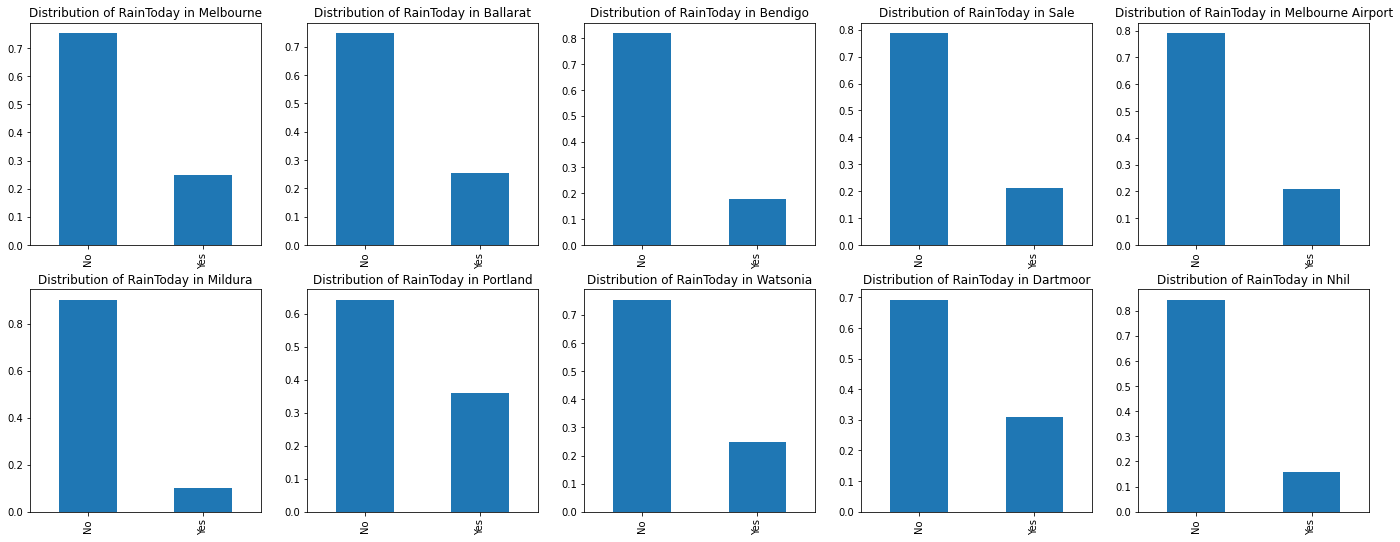

In [1434]:
cat_col = 'RainToday'
locations = weather_data_vic_chronological['Location'].unique()
plt.figure(figsize=(24,9))

for i in range(len(locations)):

    plt.subplot(2,5,i+1)
    plt.title(f'Distribution of {cat_col} in {locations[i]}')
    data_one_loc = weather_data_vic_chronological[
        weather_data_vic_chronological.Location == locations[i]
    ]

    data_one_loc[cat_col].value_counts(normalize=True).plot.bar()

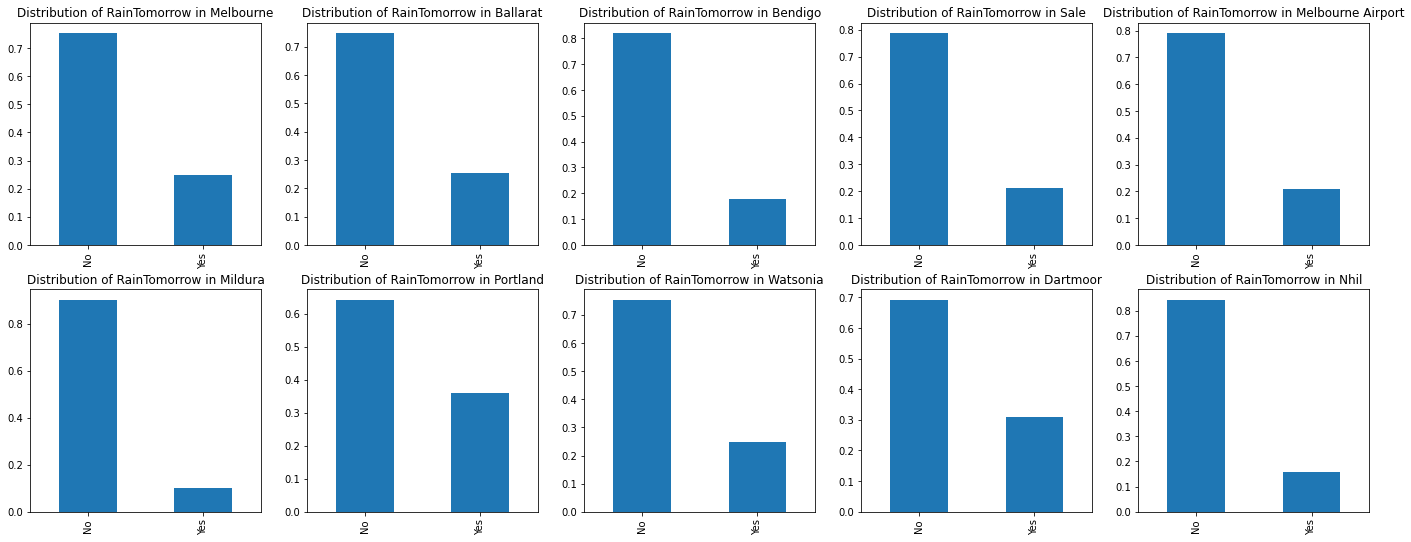

In [1435]:
cat_col = 'RainTomorrow'
locations = weather_data_vic_chronological['Location'].unique()
plt.figure(figsize=(24,9))

for i in range(len(locations)):

    plt.subplot(2,5,i+1)
    plt.title(f'Distribution of {cat_col} in {locations[i]}')
    data_one_loc = weather_data_vic_chronological[
        weather_data_vic_chronological.Location == locations[i]
    ]

    data_one_loc[cat_col].value_counts(normalize=True).plot.bar()

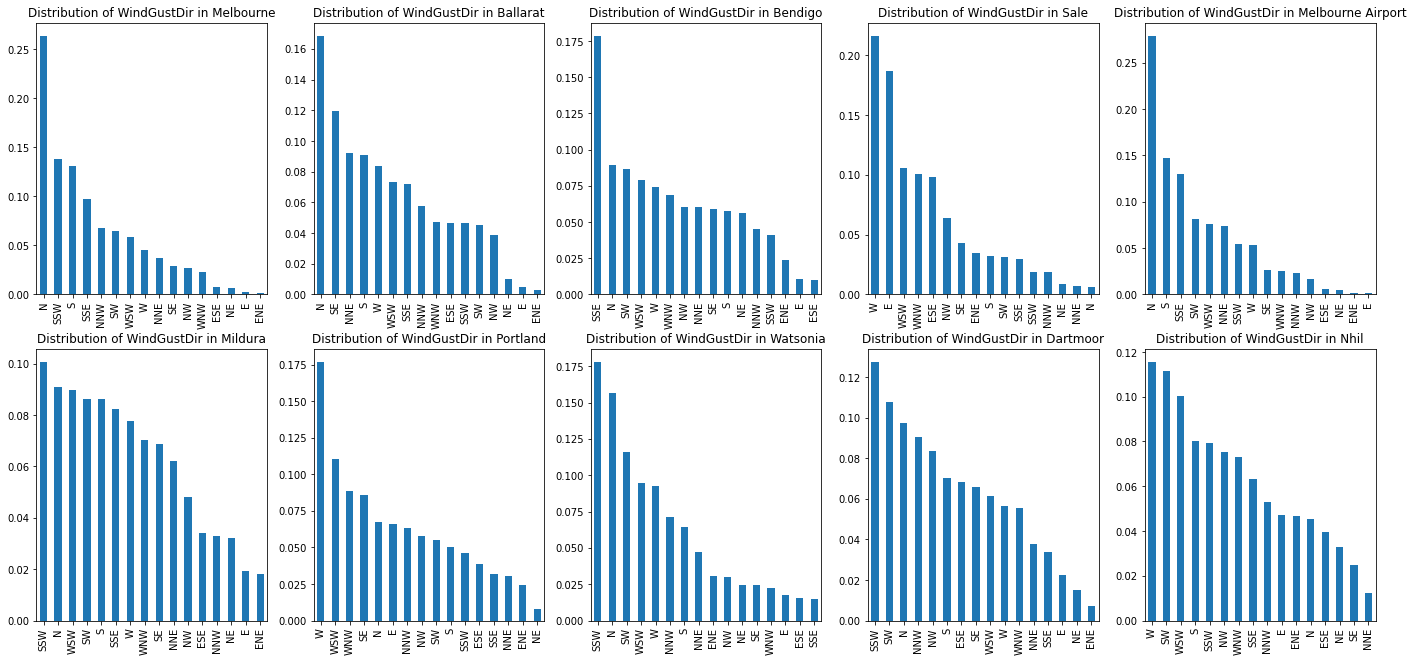

In [1437]:
cat_col = 'WindGustDir'
locations = weather_data_vic_chronological['Location'].unique()
plt.figure(figsize=(24,11))

for i in range(len(locations)):

    plt.subplot(2,5,i+1)
    plt.title(f'Distribution of {cat_col} in {locations[i]}')
    data_one_loc = weather_data_vic_chronological[
        weather_data_vic_chronological.Location == locations[i]
    ]

    data_one_loc[cat_col].value_counts(normalize=True).plot.bar()

# Arbitrary decision to impute using the mode for each location, 
- but given that % of missing values is small, letting some error propagating into the validity of the data probably won't really hurt. This will be listed as an assumption later.

In [1462]:
cat_cols_to_be_imputed = ['RainToday', 'RainTomorrow', 'WindGustDir']
for loc in weather_data_vic_chronological['Location'].unique():
    #subset the weather data into those just from the location "loc"
    weather_data_loc = weather_data_vic_chronological[
        weather_data_vic_chronological.Location == loc
    ]

    #impute all 3 categorical columns 
    for cat_col in cat_cols_to_be_imputed:
        
        #obtain the mode for cat_col, when we only consider observations from loc
        mode_cat_col_for_loc = weather_data_loc[cat_col].mode()[0]

        #impute 
        weather_data_vic_chronological.loc[weather_data_vic_chronological.Location == loc, cat_col] = \
            weather_data_vic_chronological.loc[weather_data_vic_chronological.Location == loc, cat_col].fillna(
                mode_cat_col_for_loc)

        

# No more Missing values to handle. Save the current preprocessed dataset, for now

In [1466]:
weather_data_vic_chronological.isna().sum()

Day                   0
Month                 0
Year                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
WindGustDir           0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Temp9am               0
Temp3pm               0
RainToday             0
RISK_MM               0
RainTomorrow          0
latitude              0
longitude             0
coord_point_object    0
dtype: int64

In [1467]:
history_weather_preproc.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [1468]:
history_weather_preproc[9] = {'data':None, 'description':None}
history_weather_preproc[9]['data'] = weather_data_vic_chronological.copy()
history_weather_preproc[9]['description'] = "Imputing missing values from categorical columns"

In [1482]:
#save to curated folder
history_weather_preproc[9]['data'].to_csv('../data/curated/Preproc_Weather_Data.csv')

In [1483]:
history_weather_preproc[9]['data']

,Day,Month,Year,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude,coord_point_object
49580,1,7,2008,Melbourne,9.5,15.4,2.0,W,63.0,37.0,...,1006.8,1010.3,11.0,14.6,Yes,0.6,No,-37.8075,144.9700,POINT (144.97 -37.8075)
49581,2,7,2008,Melbourne,11.0,14.5,0.6,W,63.0,30.0,...,1013.4,1016.2,11.8,13.7,No,1.4,Yes,-37.8075,144.9700,POINT (144.97 -37.8075)
49582,3,7,2008,Melbourne,8.4,14.1,1.4,W,39.0,17.0,...,1024.8,1024.3,10.6,13.9,Yes,0.6,No,-37.8075,144.9700,POINT (144.97 -37.8075)
49583,4,7,2008,Melbourne,9.1,14.5,0.6,E,19.0,9.0,...,1030.2,1029.0,10.2,13.1,No,0.0,No,-37.8075,144.9700,POINT (144.97 -37.8075)
49584,5,7,2008,Melbourne,4.3,15.5,0.0,N,52.0,24.0,...,1028.9,1024.9,5.5,14.6,No,0.0,No,-37.8075,144.9700,POINT (144.97 -37.8075)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58763,28,8,2022,Mildura,5.1,24.0,0.0,N,50.0,15.0,...,1022.6,1017.2,13.6,23.0,No,0.0,No,-34.2358,142.0867,POINT (142.0867 -34.2358)
61832,28,8,2022,Nhil,7.2,20.3,0.0,NNE,30.0,11.0,...,1022.1,1017.6,11.4,19.9,No,0.0,No,-36.3092,141.6486,POINT (141.6486 -36.3092)
66332,28,8,2022,Portland,8.0,19.7,0.0,NNE,35.0,15.0,...,1020.7,1016.9,12.4,19.2,No,0.2,No,-38.3148,141.4705,POINT (141.4705 -38.3148)
70832,28,8,2022,Watsonia,5.7,20.0,0.0,N,31.0,4.0,...,1024.6,1020.9,13.1,19.6,No,0.0,No,-37.7408,145.0972,POINT (145.0972 -37.7408)


# II. Preprocess the employment dataset

Similar to preprocessing the weather dataset, 

To make the preprocessing steps more compact, versatile, and reversible, 

I will create a dictionary (where its value is also a dictionary) as such: 

- <code> history_employ_preproc = { num_iteration: {'data': pd_data, 'description': what_is_done} } </code>, where: 
    - <code>num_iteration = 0,1,2,...</code> signifying how many times the dataset has been altered for preprocessing
    - <code>history_employ_preproc[num_iteration]['description']</code> is a (preferrably short) description of what has been done to the dataframe, in which the resulting dataframe will be stored in <code>history_employ_preproc[num_iteration]['data']</code>



A caveat of this is that it can be memory intensive but we'll see the consequences later

In [834]:
history_employ_preproc = {0: {'data': employment_data_raw, 'description':'raw data'} }

In [835]:
employment_data_raw.head()

,Note,"Cells containing a dash (-) indicate that data are unavailable. Estimates are unavailable either because the SA2 labour force estimate did not meet the minimum size or because there is a break in the series caused by the shift from the 2011 to the 2016 ASGS. For more information, see SALM Methodology page on the National Skills Commission (NSC) website and the 2016 ASGS changeover user guide (also available from the NSC website).",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Data Item,Statistical Area Level 2 (SA2) (2016 ASGS),SA2 Code (2016 ASGS),Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
1,Smoothed unemployment (persons),Braidwood,101021007,53,42,38,39,44,47,51,...,65,64,73,72,79,85,88,94,103,109
2,Smoothed unemployment (persons),Karabar,101021008,132,99,88,83,91,96,100,...,170,182,202,191,204,210,224,242,258,267
3,Smoothed unemployment (persons),Queanbeyan,101021009,209,164,139,135,143,152,159,...,179,192,223,225,248,261,274,298,314,323
4,Smoothed unemployment (persons),Queanbeyan - East,101021010,50,39,35,34,39,43,45,...,61,63,76,77,88,94,97,106,112,118


Now the first row should be the columns instead of the current one, which is not uncommon for excel files to have notes on top of the data itself

In [839]:
original_cols = list(history_employ_preproc[0]['data'].iloc[0,:])

Mapping the original columns to the desired columns

In [843]:
map_curr_col_to_original_cols = dict(zip(history_employ_preproc[0]['data'].columns, original_cols))

# <font color='blue'>Preprocessing: fix the column names </font>

In [853]:
history_employ_preproc[1] = {'data':None, 'description':None}
history_employ_preproc[1]['data'] = history_employ_preproc[0]['data'].rename(columns = map_curr_col_to_original_cols).drop(0).copy()
history_employ_preproc[1]['description'] = 'Fixing the columns'

In [854]:
history_employ_preproc[1]['data']

,Data Item,Statistical Area Level 2 (SA2) (2016 ASGS),SA2 Code (2016 ASGS),Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
1,Smoothed unemployment (persons),Braidwood,101021007,53,42,38,39,44,47,51,...,65,64,73,72,79,85,88,94,103,109
2,Smoothed unemployment (persons),Karabar,101021008,132,99,88,83,91,96,100,...,170,182,202,191,204,210,224,242,258,267
3,Smoothed unemployment (persons),Queanbeyan,101021009,209,164,139,135,143,152,159,...,179,192,223,225,248,261,274,298,314,323
4,Smoothed unemployment (persons),Queanbeyan - East,101021010,50,39,35,34,39,43,45,...,61,63,76,77,88,94,97,106,112,118
5,Smoothed unemployment (persons),Queanbeyan Region,101021011,78,59,48,42,45,47,52,...,88,94,124,127,142,153,151,160,163,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,Smoothed unemployment rate (%),Torrens,801091110,4,3.7,4.1,4.1,4.1,4.5,4,...,3.4,2.9,2.9,2.8,2.9,3.2,3.4,3.7,4.1,4
6519,Smoothed unemployment rate (%),Coombs,801101135,-,-,-,-,-,-,-,...,-,3.6,3.4,3.3,3.3,3.5,3.4,3.1,3.2,3
6520,Smoothed unemployment rate (%),Denman Prospect,801101136,-,-,-,-,-,-,-,...,-,2.8,2.6,2.4,2.4,2.8,2.9,3.3,3.7,4
6521,Smoothed unemployment rate (%),Wright,801101139,-,-,-,-,-,-,-,...,-,0.8,1.1,1.3,1.5,1.8,1.9,1.9,1.9,1.8


# Take a look at <code>Data Item</code>. It seems that it provides an indicator of what do the numbers mean.

In [855]:
history_employ_preproc[1]['data']['Data Item'].unique()

array(['Smoothed unemployment (persons)',
       'Smoothed labour force (persons)',
       'Smoothed unemployment rate (%)'], dtype=object)

# <font color='blue'> Preprocessing: we only need unemployment rate. The number of ppl itself isn't really useful </font>

In [862]:
history_employ_preproc[2] = {'data':None, 'description':None}

history_employ_preproc[2]['data'] = history_employ_preproc[1]['data'][
    history_employ_preproc[1]['data']['Data Item'] == 'Smoothed unemployment rate (%)'
].drop(columns='Data Item').copy()


#also, renaming the first 2 columns to make their names easier to read:

history_employ_preproc[2]['data'] = history_employ_preproc[2]['data'].\
    rename(columns={'Statistical Area Level 2 (SA2) (2016 ASGS)':'SA2_Name',
                    'SA2 Code (2016 ASGS)':'SA2_Code'})


history_employ_preproc[2]['description'] = 'Only obtain unemployment rates, fix first 2 column names'

In [863]:
history_employ_preproc[2]['data']

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
4349,Braidwood,101021007,3,2.3,2.1,2.1,2.3,2.5,2.7,2.8,...,2.9,2.9,3.2,3.2,3.6,4,4.2,4.6,5.1,5.3
4350,Karabar,101021008,2.5,1.8,1.6,1.5,1.6,1.7,1.8,2.1,...,3.4,3.7,4,3.9,4.2,4.5,4.9,5.4,5.8,6
4351,Queanbeyan,101021009,3.3,2.5,2.1,2,2.1,2.3,2.3,2.7,...,2.6,2.7,3.2,3.2,3.6,3.9,4.2,4.7,5,5.1
4352,Queanbeyan - East,101021010,1.6,1.2,1.1,1,1.2,1.3,1.3,1.5,...,1.8,1.9,2.3,2.3,2.7,3,3.2,3.6,3.8,4
4353,Queanbeyan Region,101021011,0.9,0.7,0.5,0.5,0.5,0.5,0.6,0.6,...,0.7,0.7,1,1,1.1,1.2,1.2,1.4,1.4,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,Torrens,801091110,4,3.7,4.1,4.1,4.1,4.5,4,4.1,...,3.4,2.9,2.9,2.8,2.9,3.2,3.4,3.7,4.1,4
6519,Coombs,801101135,-,-,-,-,-,-,-,-,...,-,3.6,3.4,3.3,3.3,3.5,3.4,3.1,3.2,3
6520,Denman Prospect,801101136,-,-,-,-,-,-,-,-,...,-,2.8,2.6,2.4,2.4,2.8,2.9,3.3,3.7,4
6521,Wright,801101139,-,-,-,-,-,-,-,-,...,-,0.8,1.1,1.3,1.5,1.8,1.9,1.9,1.9,1.8


Now, pick the SA2s *only* in Victoria. 
- To do this need to look at the lookup dataset <code>sa2_and_states</code> created at the beginning of this notebook.

In [864]:
sa2_and_states.head() 

,SA2_5DIGITCODE_2016,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,GCCSA_CODE_2016,GCCSA_NAME_2016,STATE_CODE_2016,STATE_NAME_2016,AREA_ALBERS_SQKM,Unnamed: 12,Unnamed: 13
0,11007,101021007,Braidwood,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3418.3525,NaN,NaN
1,11008,101021008,Karabar,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,6.9825,NaN,This spreadsheet is downloaded from the ABS We...
2,11009,101021009,Queanbeyan,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,4.7634,NaN,https://www.abs.gov.au/AUSSTATS/abs@.nsf/Detai...
3,11010,101021010,Queanbeyan - East,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,13.0034,NaN,Its name is
4,11011,101021011,Queanbeyan Region,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,3054.4099,NaN,Statistical Area Level 2 (SA2) ASGS Edition 20...


Hence, we only need <code>['SA2_MAINCODE_2016', 'SA2_NAME_2016']</code>
- and <code>'STATE_NAME_2016'</code> but just for filtering SA2s in Victoria

In [869]:
sa2s_in_vic = sa2_and_states[sa2_and_states['STATE_NAME_2016'] == 'Victoria'][['SA2_MAINCODE_2016', 'SA2_NAME_2016']]

In [870]:
sa2s_in_vic

,SA2_MAINCODE_2016,SA2_NAME_2016
578,201011001,Alfredton
579,201011002,Ballarat
580,201011003,Ballarat - North
581,201011004,Ballarat - South
582,201011005,Buninyong
...,...,...
1037,217041478,Moyne - West
1038,217041479,Warrnambool - North
1039,217041480,Warrnambool - South
1040,297979799,Migratory - Offshore - Shipping (Vic.)


Perform an inner join (inner because we don't care about the rest of SA2s outside Victoria)

In [874]:
history_employ_preproc[2]['data']

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
4349,Braidwood,101021007,3,2.3,2.1,2.1,2.3,2.5,2.7,2.8,...,2.9,2.9,3.2,3.2,3.6,4,4.2,4.6,5.1,5.3
4350,Karabar,101021008,2.5,1.8,1.6,1.5,1.6,1.7,1.8,2.1,...,3.4,3.7,4,3.9,4.2,4.5,4.9,5.4,5.8,6
4351,Queanbeyan,101021009,3.3,2.5,2.1,2,2.1,2.3,2.3,2.7,...,2.6,2.7,3.2,3.2,3.6,3.9,4.2,4.7,5,5.1
4352,Queanbeyan - East,101021010,1.6,1.2,1.1,1,1.2,1.3,1.3,1.5,...,1.8,1.9,2.3,2.3,2.7,3,3.2,3.6,3.8,4
4353,Queanbeyan Region,101021011,0.9,0.7,0.5,0.5,0.5,0.5,0.6,0.6,...,0.7,0.7,1,1,1.1,1.2,1.2,1.4,1.4,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,Torrens,801091110,4,3.7,4.1,4.1,4.1,4.5,4,4.1,...,3.4,2.9,2.9,2.8,2.9,3.2,3.4,3.7,4.1,4
6519,Coombs,801101135,-,-,-,-,-,-,-,-,...,-,3.6,3.4,3.3,3.3,3.5,3.4,3.1,3.2,3
6520,Denman Prospect,801101136,-,-,-,-,-,-,-,-,...,-,2.8,2.6,2.4,2.4,2.8,2.9,3.3,3.7,4
6521,Wright,801101139,-,-,-,-,-,-,-,-,...,-,0.8,1.1,1.3,1.5,1.8,1.9,1.9,1.9,1.8


In [876]:
history_employ_preproc[2]['data'].dtypes['SA2_Code'], sa2s_in_vic.dtypes['SA2_MAINCODE_2016']

(dtype('O'), dtype('int64'))

We want to join based on the SA2 codes but the data types aren't the same.

<font color='blue'> Preprocessing: type cast the SA2 codes in the employment dataset to integers </font>

In [877]:
history_employ_preproc[2]['data']['SA2_Code'] = history_employ_preproc[2]['data']['SA2_Code'].astype('int')

In [879]:
history_employ_preproc[2]['description'] += ' and typecasted SA2_Code as integers'

# <font color='blue'>Preprocessing: for employment data, filter out SA2s that are outside Victoria </font>

Document this preprocessing step

In [885]:
#how many iterations are we in at the employment data?
history_employ_preproc.keys()

dict_keys([0, 1, 2])

In [886]:
history_employ_preproc[3] = {'data':None, 'description':None}

history_employ_preproc[3]['data'] = history_employ_preproc[2]['data'].\
    merge(sa2s_in_vic, left_on='SA2_Code', right_on='SA2_MAINCODE_2016', how='inner').\
    drop(columns=['SA2_MAINCODE_2016', 'SA2_NAME_2016']).copy()

history_employ_preproc[3]['description'] = 'filter out SA2s outside Victoria'

In [887]:
history_employ_preproc[3]['data']

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
0,Alfredton,201011001,2.9,2.7,2.8,2.7,2.6,2.7,2.4,2.3,...,1.5,1.4,1.9,2.6,3.4,3.7,3.4,2.7,2.2,1.8
1,Ballarat,201011002,7.8,7.3,7.3,6.9,6.3,6.1,5.7,5.5,...,3.3,2.8,3.4,4.2,5.2,5.3,4.8,3.8,3.1,2.6
2,Ballarat - North,201011003,6.5,6.2,6.3,6,5.6,5.4,5.1,4.9,...,3.2,2.8,3.5,4.5,5.6,5.8,5.4,4.2,3.5,3
3,Ballarat - South,201011004,9.6,9,9,8.5,8,7.8,7.3,6.9,...,5.3,4.5,5.6,7,8.8,9.1,8.6,7,5.9,5.1
4,Buninyong,201011005,3.3,3.3,3.3,3.2,2.9,2.6,2.4,2.5,...,1.6,1.4,1.9,2.4,3.1,3.4,3.2,2.5,2,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Otway,217031476,3.6,4.9,5.2,5.4,5.7,5.4,5.2,5.5,...,1.8,1.7,2.1,2.5,2.8,3.5,3.7,3.7,3.7,2.9
447,Moyne - East,217041477,2.9,3.7,3.9,3.9,3.7,3.6,3.5,3.8,...,2.2,2.4,2.6,2.8,2.7,3.1,3.2,3.3,3.5,3
448,Moyne - West,217041478,2.7,3.7,3.9,4,3.9,3.4,3.1,3.1,...,1.9,2.1,2.2,2.3,2.2,2.4,2.5,2.5,2.6,2.2
449,Warrnambool - North,217041479,4.4,5.9,6.2,6.2,6,5.5,5.1,5.4,...,3,3.2,3.2,3.3,3.1,3.5,3.7,3.8,4,3.3


# Data types for unemployment rates

In [889]:
history_employ_preproc[3]['data'].dtypes.iloc[2:].head()

Dec-10    object
Mar-11    object
Jun-11    object
Sep-11    object
Dec-11    object
dtype: object

# Need to type cast the numeric unemployment rates and watch out for missing values (which, according to the documention, is marked with '-').

Also, need to make sure that there's no other funky, weird values

In [948]:
non_numeric_chars = set()

#skip first 2 columns because they are sa2 names and sa2 codes
for col in history_employ_preproc[3]['data'].columns[2:]:

    #extract all cells with non-numeric characters (cells like 2.3 or 2 won't be included)
    non_numeric_chars = non_numeric_chars.union(
        set(history_employ_preproc[3]['data'][col][
            history_employ_preproc[3]['data'][col].str.findall(r'[^\d^.]').astype(bool) == True
            ].\
            unique())
        )


In [949]:
non_numeric_chars

{'-'}

Then we can treat all values with '-' as <code>NaN</code>s, and type cast the numbers as floats

# <font color='blue'> Preprocessing: replacing all '-' with <code>NaN</code>s and typecasted numbers as floats</font>

In [959]:
#how many iterations have we achieved?
history_employ_preproc.keys()

dict_keys([0, 1, 2, 3])

In [960]:
history_employ_preproc[4] = {'data':None, 'description':None}

In [961]:
#replace '-' with NaNs so that we can typecast it
history_employ_preproc[4]['data'] = history_employ_preproc[3]['data'].replace('-',None).copy()

In [964]:
#typecast the numeric unemployment rates as floats instead of strings
history_employ_preproc[4]['data'].iloc[:,2:] = history_employ_preproc[4]['data'].iloc[:,2:].astype('float')

In [966]:
history_employ_preproc[4]['description'] = "Replaced '-'s with NaNs and typecasted numbers as floats"

In [967]:
history_employ_preproc[4]['data']

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
0,Alfredton,201011001,2.9,2.7,2.8,2.7,2.6,2.7,2.4,2.3,...,1.5,1.4,1.9,2.6,3.4,3.7,3.4,2.7,2.2,1.8
1,Ballarat,201011002,7.8,7.3,7.3,6.9,6.3,6.1,5.7,5.5,...,3.3,2.8,3.4,4.2,5.2,5.3,4.8,3.8,3.1,2.6
2,Ballarat - North,201011003,6.5,6.2,6.3,6.0,5.6,5.4,5.1,4.9,...,3.2,2.8,3.5,4.5,5.6,5.8,5.4,4.2,3.5,3.0
3,Ballarat - South,201011004,9.6,9.0,9.0,8.5,8.0,7.8,7.3,6.9,...,5.3,4.5,5.6,7.0,8.8,9.1,8.6,7.0,5.9,5.1
4,Buninyong,201011005,3.3,3.3,3.3,3.2,2.9,2.6,2.4,2.5,...,1.6,1.4,1.9,2.4,3.1,3.4,3.2,2.5,2.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Otway,217031476,3.6,4.9,5.2,5.4,5.7,5.4,5.2,5.5,...,1.8,1.7,2.1,2.5,2.8,3.5,3.7,3.7,3.7,2.9
447,Moyne - East,217041477,2.9,3.7,3.9,3.9,3.7,3.6,3.5,3.8,...,2.2,2.4,2.6,2.8,2.7,3.1,3.2,3.3,3.5,3.0
448,Moyne - West,217041478,2.7,3.7,3.9,4.0,3.9,3.4,3.1,3.1,...,1.9,2.1,2.2,2.3,2.2,2.4,2.5,2.5,2.6,2.2
449,Warrnambool - North,217041479,4.4,5.9,6.2,6.2,6.0,5.5,5.1,5.4,...,3.0,3.2,3.2,3.3,3.1,3.5,3.7,3.8,4.0,3.3


# Check for Missing Values

Missing unemployment rates per Month-Year pair 

In [1493]:
history_employ_preproc[4]['data'].isna().sum().sort_values(ascending=False)

Dec-10      50
Mar-11      50
Jun-11      50
Sep-11      50
Jun-16      49
Jun-17      49
Dec-15      49
Mar-16      49
Sep-16      49
Dec-16      49
Mar-17      49
Dec-17      49
Sep-17      49
Mar-15      49
Mar-18      49
Jun-18      49
Sep-18      49
Jun-15      49
Sep-15      49
Dec-14      49
Jun-13      49
Dec-11      49
Mar-12      49
Jun-12      49
Sep-14      49
Dec-12      49
Mar-13      49
Sep-12      49
Sep-13      49
Dec-13      49
Mar-14      49
Jun-14      49
Dec-18      48
Mar-19      48
Jun-19      48
Sep-19      48
Dec-19      48
Dec-21       0
Dec-20       0
Sep-21       0
Jun-21       0
Mar-21       0
SA2_Name     0
Sep-20       0
Jun-20       0
Mar-20       0
SA2_Code     0
Mar-22       0
dtype: int64

Missing unemployment rates per SA2 throughout time

In [1487]:
missing_vals_per_SA2 = history_employ_preproc[4]['data'].isna().sum(axis=1)[
    history_employ_preproc[4]['data'].isna().sum(axis=1).gt(0)
].sort_values(ascending=False)

In [1488]:
missing_vals_per_SA2

262    37
318    37
264    37
265    37
273    37
274    37
275    37
305    37
306    37
307    37
308    37
317    37
328    37
151    37
329    37
371    37
372    37
373    37
381    37
382    37
383    37
384    37
385    37
415    37
263    37
416    37
253    37
252    37
152    37
174    37
175    37
199    37
200    37
216    37
217    37
218    37
219    37
220    37
221    37
222    37
223    37
236    37
237    37
238    37
244    37
249    37
250    37
251    37
122    32
246     4
dtype: int64

In [1494]:
#How many SA2s have at least 1 missing value?
missing_vals_per_SA2.shape[0]

50

In [1491]:
history_employ_preproc[4]['data'][
    history_employ_preproc[4]['data'].index.isin(missing_vals_per_SA2.index)
]

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
122,Port Melbourne Industrial,206051131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,0.4,1.9,4.4,6.4,8.3,8.5,7.4,6.3,5.4
151,Doncaster East (North),207021424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,5.7,5.9,6.3,7.0,6.7,6.6,6.4,5.3
152,Doncaster East (South),207021425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.1,7.2,7.1,7.6,8.3,8.4,8.4,8.0,6.6
174,Bentleigh East (North),208021426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,4.3,5.0,6.0,6.2,5.6,4.8,3.8,3.1
175,Bentleigh East (South),208021427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.1,4.8,5.4,6.4,6.6,6.0,5.1,4.0,3.2
199,Preston - East,209021428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.1,6.7,7.6,8.5,9.1,8.9,7.8,6.8,5.8
200,Preston - West,209021429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.7,4.2,5.0,5.8,6.6,6.4,5.6,4.9,4.2
216,Doreen,209041430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,3.4,4.2,5.1,5.6,5.6,4.9,4.1,3.4
217,Epping - East,209041431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.5,6.8,7.7,8.7,9.3,9.2,8.4,7.3,6.3
218,Epping - South,209041432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.2,9.0,10.6,12.2,13.0,12.9,11.2,9.4,7.8


In [1495]:
#biggest one is 37
history_employ_preproc[4]['data'][
    history_employ_preproc[4]['data'].index.isin(missing_vals_per_SA2[missing_vals_per_SA2 == missing_vals_per_SA2.max()].index)
]

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
151,Doncaster East (North),207021424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,5.7,5.9,6.3,7.0,6.7,6.6,6.4,5.3
152,Doncaster East (South),207021425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.1,7.2,7.1,7.6,8.3,8.4,8.4,8.0,6.6
174,Bentleigh East (North),208021426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,4.3,5.0,6.0,6.2,5.6,4.8,3.8,3.1
175,Bentleigh East (South),208021427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.1,4.8,5.4,6.4,6.6,6.0,5.1,4.0,3.2
199,Preston - East,209021428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.1,6.7,7.6,8.5,9.1,8.9,7.8,6.8,5.8
200,Preston - West,209021429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.7,4.2,5.0,5.8,6.6,6.4,5.6,4.9,4.2
216,Doreen,209041430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,3.4,4.2,5.1,5.6,5.6,4.9,4.1,3.4
217,Epping - East,209041431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.5,6.8,7.7,8.7,9.3,9.2,8.4,7.3,6.3
218,Epping - South,209041432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.2,9.0,10.6,12.2,13.0,12.9,11.2,9.4,7.8
219,Epping - West,209041433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,5.3,6.3,7.5,8.1,7.8,6.9,5.5,4.5


There are 9 columns from <code>Mar-20</code> to <code>Mar-22</code>
- So it's safe to say that the instances above don't have their unemployment rates recorded from December 10 to December 2019.

Since our time frame is surely going to be prior 2020, we can drop them all.

# <font color='blue'>Preprocessing: drop instances/SA2s that didn't have their unemployment rates recorded from Dec 2019 backwards </font>

In [1501]:
#biggest one is 37
unemp_removed_SA2s = history_employ_preproc[4]['data'][
    ~history_employ_preproc[4]['data'].index.isin(missing_vals_per_SA2[missing_vals_per_SA2 == missing_vals_per_SA2.max()].index)
]

In [1506]:
unemp_removed_SA2s

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
0,Alfredton,201011001,2.9,2.7,2.8,2.7,2.6,2.7,2.4,2.3,...,1.5,1.4,1.9,2.6,3.4,3.7,3.4,2.7,2.2,1.8
1,Ballarat,201011002,7.8,7.3,7.3,6.9,6.3,6.1,5.7,5.5,...,3.3,2.8,3.4,4.2,5.2,5.3,4.8,3.8,3.1,2.6
2,Ballarat - North,201011003,6.5,6.2,6.3,6.0,5.6,5.4,5.1,4.9,...,3.2,2.8,3.5,4.5,5.6,5.8,5.4,4.2,3.5,3.0
3,Ballarat - South,201011004,9.6,9.0,9.0,8.5,8.0,7.8,7.3,6.9,...,5.3,4.5,5.6,7.0,8.8,9.1,8.6,7.0,5.9,5.1
4,Buninyong,201011005,3.3,3.3,3.3,3.2,2.9,2.6,2.4,2.5,...,1.6,1.4,1.9,2.4,3.1,3.4,3.2,2.5,2.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Otway,217031476,3.6,4.9,5.2,5.4,5.7,5.4,5.2,5.5,...,1.8,1.7,2.1,2.5,2.8,3.5,3.7,3.7,3.7,2.9
447,Moyne - East,217041477,2.9,3.7,3.9,3.9,3.7,3.6,3.5,3.8,...,2.2,2.4,2.6,2.8,2.7,3.1,3.2,3.3,3.5,3.0
448,Moyne - West,217041478,2.7,3.7,3.9,4.0,3.9,3.4,3.1,3.1,...,1.9,2.1,2.2,2.3,2.2,2.4,2.5,2.5,2.6,2.2
449,Warrnambool - North,217041479,4.4,5.9,6.2,6.2,6.0,5.5,5.1,5.4,...,3.0,3.2,3.2,3.3,3.1,3.5,3.7,3.8,4.0,3.3


In [1517]:
#calculate remaining instances that has at least 1 missing value
remanining_SA2s_with_missvals = unemp_removed_SA2s.isna().sum(axis=1)[
    unemp_removed_SA2s.isna().sum(axis=1).gt(0)
]
remanining_SA2s_with_missvals

122    32
246     4
dtype: int64

In [1515]:
remaining_instances_with_miss_vals = unemp_removed_SA2s[unemp_removed_SA2s.index.isin(remanining_SA2s_with_missvals.index)]

In [1519]:
remaining_instances_with_miss_vals

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
122,Port Melbourne Industrial,206051131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,0.4,1.9,4.4,6.4,8.3,8.5,7.4,6.3,5.4
246,Melbourne Airport,210051248,NaN,NaN,NaN,NaN,1.0,0.9,0.9,0.9,...,1.3,1.9,2.6,4.6,6.0,6.7,5.9,4.6,3.9,3.9


Plotting the unemployment rates throughout time for Melbourne Airport

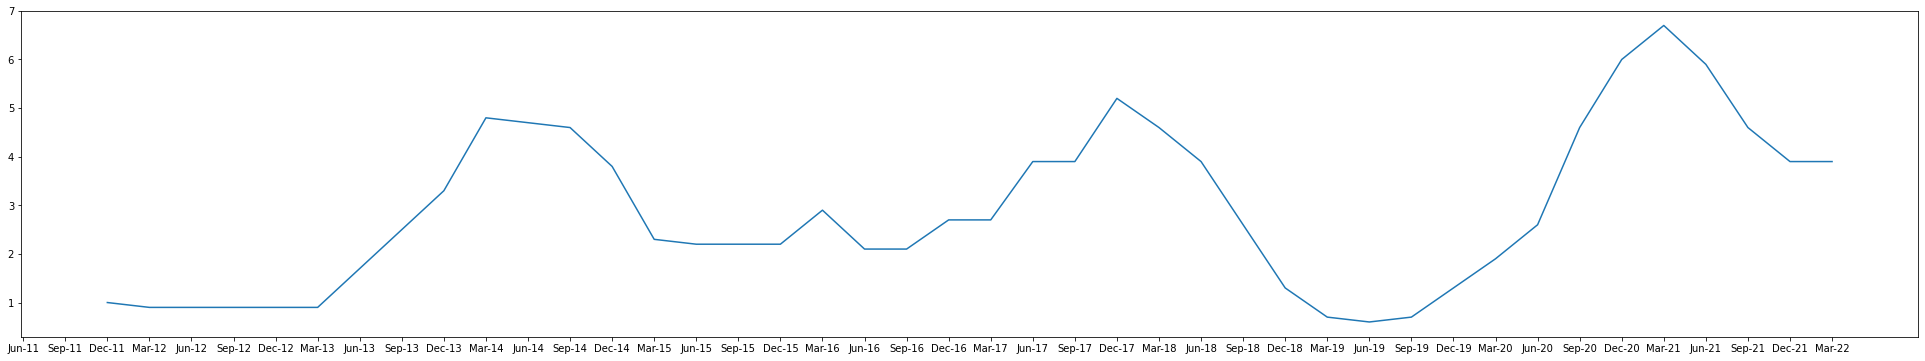

In [1524]:
plt.figure(figsize=(34,6))
plt.plot(remaining_instances_with_miss_vals.iloc[1,2:])

Plotting the unemployment rates throughout time for Port Melbourne Industrial

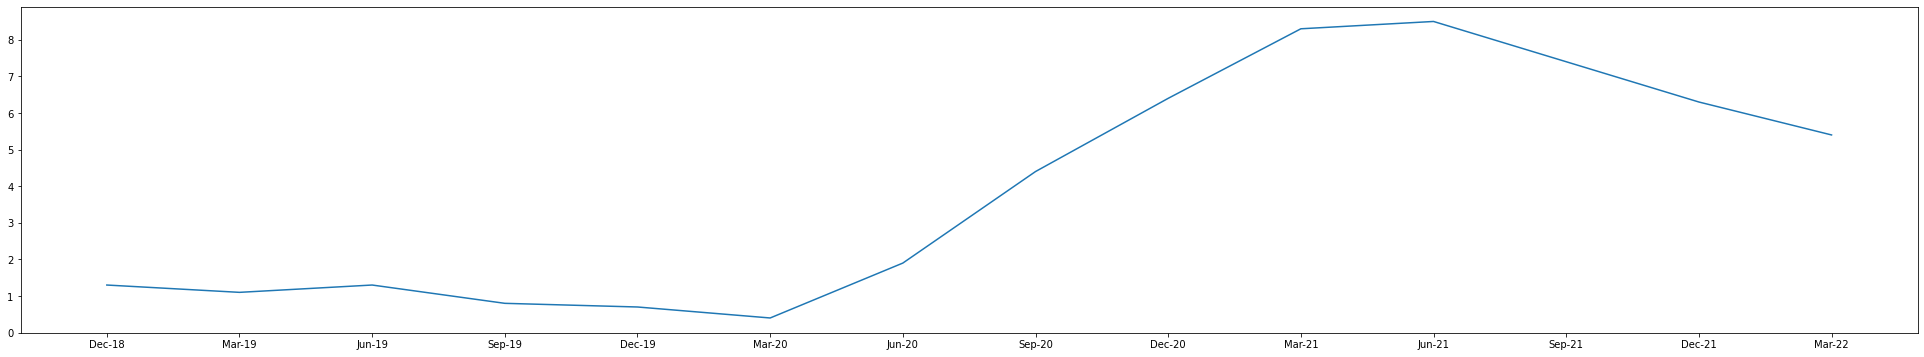

In [1525]:
plt.figure(figsize=(34,6))
plt.plot(remaining_instances_with_miss_vals.iloc[0,2:])

Now, since the unemployment rates for Port Melbourne Industrial wasn't recorded from Dec-18 backwards (accounting for 32 missing instances), better remove that instance since it's hard to second guess the values.

As for Melbourne Airport,

In [1526]:
remaining_instances_with_miss_vals

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
122,Port Melbourne Industrial,206051131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,0.4,1.9,4.4,6.4,8.3,8.5,7.4,6.3,5.4
246,Melbourne Airport,210051248,NaN,NaN,NaN,NaN,1.0,0.9,0.9,0.9,...,1.3,1.9,2.6,4.6,6.0,6.7,5.9,4.6,3.9,3.9


Again, here's the plot:

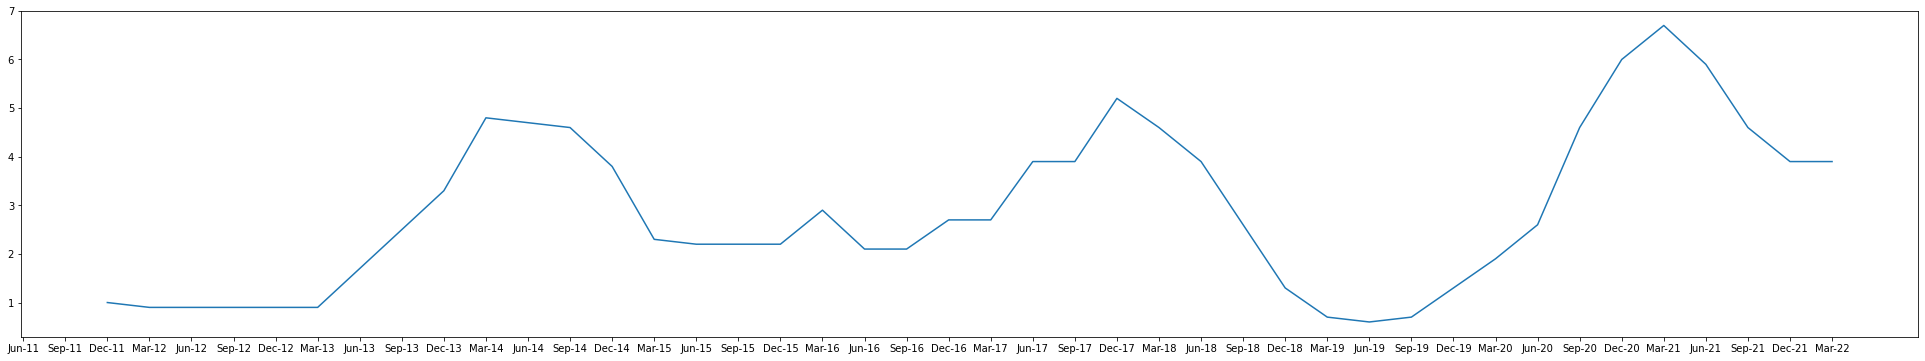

In [1527]:
plt.figure(figsize=(34,6))
plt.plot(remaining_instances_with_miss_vals.iloc[1,2:])

since the unemp rates only rose from Mar-13 onwards it might be safe to conclude that the quantitites from Mar-13 backwards probably remained on a plateau up to Jun-11.

# <font color='blue'>Preprocessing: Remove instance corresponding to Port Melbourne Industrial and for Melbourne Airport, impute the 4 initial missing values using the value in Dec-11</font>

1 corresponds to the unemployment rate in Melbourne Airport for Dec-11 (at least it wont look like a magic number)

In [1530]:
unemp_removed_SA2s

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
0,Alfredton,201011001,2.9,2.7,2.8,2.7,2.6,2.7,2.4,2.3,...,1.5,1.4,1.9,2.6,3.4,3.7,3.4,2.7,2.2,1.8
1,Ballarat,201011002,7.8,7.3,7.3,6.9,6.3,6.1,5.7,5.5,...,3.3,2.8,3.4,4.2,5.2,5.3,4.8,3.8,3.1,2.6
2,Ballarat - North,201011003,6.5,6.2,6.3,6.0,5.6,5.4,5.1,4.9,...,3.2,2.8,3.5,4.5,5.6,5.8,5.4,4.2,3.5,3.0
3,Ballarat - South,201011004,9.6,9.0,9.0,8.5,8.0,7.8,7.3,6.9,...,5.3,4.5,5.6,7.0,8.8,9.1,8.6,7.0,5.9,5.1
4,Buninyong,201011005,3.3,3.3,3.3,3.2,2.9,2.6,2.4,2.5,...,1.6,1.4,1.9,2.4,3.1,3.4,3.2,2.5,2.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Otway,217031476,3.6,4.9,5.2,5.4,5.7,5.4,5.2,5.5,...,1.8,1.7,2.1,2.5,2.8,3.5,3.7,3.7,3.7,2.9
447,Moyne - East,217041477,2.9,3.7,3.9,3.9,3.7,3.6,3.5,3.8,...,2.2,2.4,2.6,2.8,2.7,3.1,3.2,3.3,3.5,3.0
448,Moyne - West,217041478,2.7,3.7,3.9,4.0,3.9,3.4,3.1,3.1,...,1.9,2.1,2.2,2.3,2.2,2.4,2.5,2.5,2.6,2.2
449,Warrnambool - North,217041479,4.4,5.9,6.2,6.2,6.0,5.5,5.1,5.4,...,3.0,3.2,3.2,3.3,3.1,3.5,3.7,3.8,4.0,3.3


In [1531]:
unemp_removed_SA2s[unemp_removed_SA2s.SA2_Name == 'Melbourne Airport'] = remaining_instances_with_miss_vals[
                                remaining_instances_with_miss_vals['SA2_Name'] == 'Melbourne Airport'
                                ].\
                                fillna(1)

/tmp/ipykernel_205/921634633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_removed_SA2s[unemp_removed_SA2s.SA2_Name == 'Melbourne Airport'] = remaining_instances_with_miss_vals[


In [1533]:
unemp_removed_SA2s = unemp_removed_SA2s[unemp_removed_SA2s.SA2_Name != 'Port Melbourne Industrial']

# Save current preprocessed unemployment external dataset

In [1535]:
history_employ_preproc.keys()

dict_keys([0, 1, 2, 3, 4])

In [1536]:
history_employ_preproc[5] = {'data':None, 'description':None}
history_employ_preproc[5]['data'] = unemp_removed_SA2s.copy()
history_employ_preproc[5]['description'] = "Handled last 2 SA2s with missing values"

In [1542]:
history_employ_preproc[5]['data'].to_csv('../data/curated/Preproc_Unemployment_Data.csv')